In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import least_squares, minimize, curve_fit
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.signal import find_peaks
import warnings

<h3>Local Imports</h3>

In [2]:
from constants import *
from strain_tensor import *
from density_of_states import *
from displacement import *

<p>This notebook features two base plots, namely, a density of states plot and a strain tensor eigenvalue bar chart for each of the six intrinsic point defects found in MgO crystals. Each plot features subplots corresponding to each charge state found within the band gap by the analysis in the ‘Defect_Formation_Energy.ipynb’ notebook and verified to be physically warranted by the symmetry analysis in the ‘SALCs.ipynb’ notebook.   The density of states and strain tensor plots together demonstrate the connection between the local electronic energy levels and the distortions in the crystal structure. This analysis therefore provides a concrete illustration of Jahn-Teller distortions in a real system.</p>

<p>The density of states plot features a DOS curve generated from the DFT calculations and stored in the ‘DFT_Data’ directory. The region below the valence band maximum is colored red in the plot. Similarly, the region above the conduction band minimum is colored yellow. The values for the valence band maximum and conduction band minimum were determined from a DFT calculation on an MgO crystal with no defects. The plots also feature a dotted line representing the fermi level associated with the particular relaxed defect crystal in the corresponding charge state. This helps to identify which spikes in the DOS are associated with filled electronic energy levels at the given charge state. All the functions related to generating the density of states plots are stored in the ‘density_of_states.py’ file.</p>

<p>The strain tensor bar charts help elucidate the nature of the symmetry breaking occurs upon the partial filling of a degenerate electronic state. The strain tensor eigenvalue bar charts are generated by calculating the value of the strain tensor of the crystal at the defect site using a finite difference approximation. The eigenvalues associated with each charge state are then plotted on the bar chart. The strain tensor was used as opposed to the generalized displacement tensor to ensure that the eigenvalues were real-valued and therefore provide a simpler visual demonstration of the symmetry.  When all the eigenvalues are equal, the nearest neighbor atoms surrounding the defect site have cubic symmetry. When at least one of the eigenvalues differs from the others cubic symmetry is lost. This reduction in symmetry occurs when a local degenerate electronic state is partially filled. When the degenerate states are either unfilled or completely filled the cubic symmetry is recovered. The strain tensor bar charts therefore provide evidence for associating the spikes in the density of states with particular SALCs generated in the ‘SALCs.ipynb’ notebook. Furthermore, this facilitates using the spikes in the density of states to fit a tight binding energy model as was done for the Oxygen vacancy and Magnesium anti-site defects.</p>

<p>All the plots generated by this notebook are saved to the ‘Images’ directory.</p>

<h1>Oxygen Vacancy</h1>

<p>The Oxygen vacancy is modelled as an octahedron with Magnesium atoms located at each vertex and a vacancy at the origin where the Oxygen atom would be in an MgO crystal without defects. </p>

<p>If we consider a basis set consisting of S-orbitals located at each of the octahedral vertices corresponding to each of the magnesium atoms, the SALC analysis yields three groupings of states. The lowest energy of the three is a singlet state. This state will be shown to correspond to the density of states spike seen in the band gap. Additionally, we know there must also be a triply degenerate and doubly degenerate state. However, since these two states are higher in energy than the conduction band minimum. We can see no direct evidence for them in the form of a charge state transition or a spike in the density of states. </p>

<img src="Images/MO_Diagram_Cartoons/png_files/oxygen_vacancy_mo.png"/>

<p>We know that the spike seen in the density of states must be the singlet state based on two pieces of evidence. Firstly, as the charge state of the defect transitions from +2 to 0 the fermi level rises to the spike in the density of states implying that the charge state transition which occurred is associated with the filling of the localized state responsible for the spike in the density of states. Since, this is the only charge state transition which occurs in the band gap we can say that the localized state is compatible only with singlet state based on charge counting. The second piece of evidence is from the strain tensor bar chart. We can see that the defect site in both charge states retains cubic symmetry. Since cubic symmetry is not lost over the course of the charge state transition, we know that the defect state is indeed a singlet state since Jahn-Teller distortions do not occur. </p>

<p>A two parameter tight-binding Hamiltonian was used to give quantitative justification to the yet so far qualitative analysis of the charge state.</p>

The Hamiltonian makes use of the $E_s$ parameter which captures the energy of the S-orbitals on the Magnesium atoms sites in the limit of no interaction with the other atomic orbitals. The second parameter $V_{ss}$ measures the strength of the interaction energy between S-orbitals on different vertices. The interaction strength between atomic orbitals on different vertices is taken to have an inverse square dependence on distance. This yields a Hamiltonian of the following form. 


$$
\begin{bmatrix} 
E_s                 &  \frac{V_{ss}}{d^2} & \frac{V_{ss}}{2d^2} & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}\\
\frac{V_{ss}}{d^2}  & E_s                 & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{2d^2} & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}\\
\frac{V_{ss}}{2d^2} & \frac{V_{ss}}{d^2}  & E_s                 & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}\\
\frac{V_{ss}}{d^2}  & \frac{V_{ss}}{2d^2} & \frac{V_{ss}}{d^2}  & E_s                 & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}\\
\frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}  & E_s                 & \frac{V_{ss}}{2d^2}\\
\frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{2d^2} & E_s   
\end{bmatrix}
               
$$

We have two data points, namely the energy taken from the spikes in the density of states for the q =+2 and q = 0 charge states. This is just enough data to fit the Hamiltonian in order to provide values for the $E_s$ and $V_{ss}$ parameters.  The fitting function works by generating the Hamiltonian with some given set of parameters. Then the symmetry of the eigenvectors is used to associate the eigenvalues with the data points. In this case, the eigenvalue of the eigenvector with the following form is taken to be the energy of the singlet state according to the model since the eigenvector has the symmetry of the singlet state as predicted by the SALC analysis. 

$$ 
\frac{1}{\sqrt{6}}\begin{bmatrix} 
1\\          
1\\          
1\\          
1\\          
1\\          
1\\          
\end{bmatrix}
$$

A least squares regression then yields the fitted values of the $E_s$ and $V_{ss}$ parameters. This fitted parameter then allows us to generate a plot of the states as a function of octahedral edge length. This simple model captures important properties of the system. It predicts that the triplet state will be lower than energy that the doublet state. It shows, as we should expect, that in the limit of large edge length where interatomic interaction is minimized all of the states approach the nonbonding S-orbital energy. Finally, it shows that the energy of the localized state in the band gap can be modulated by changing the edge length of the octahedron.

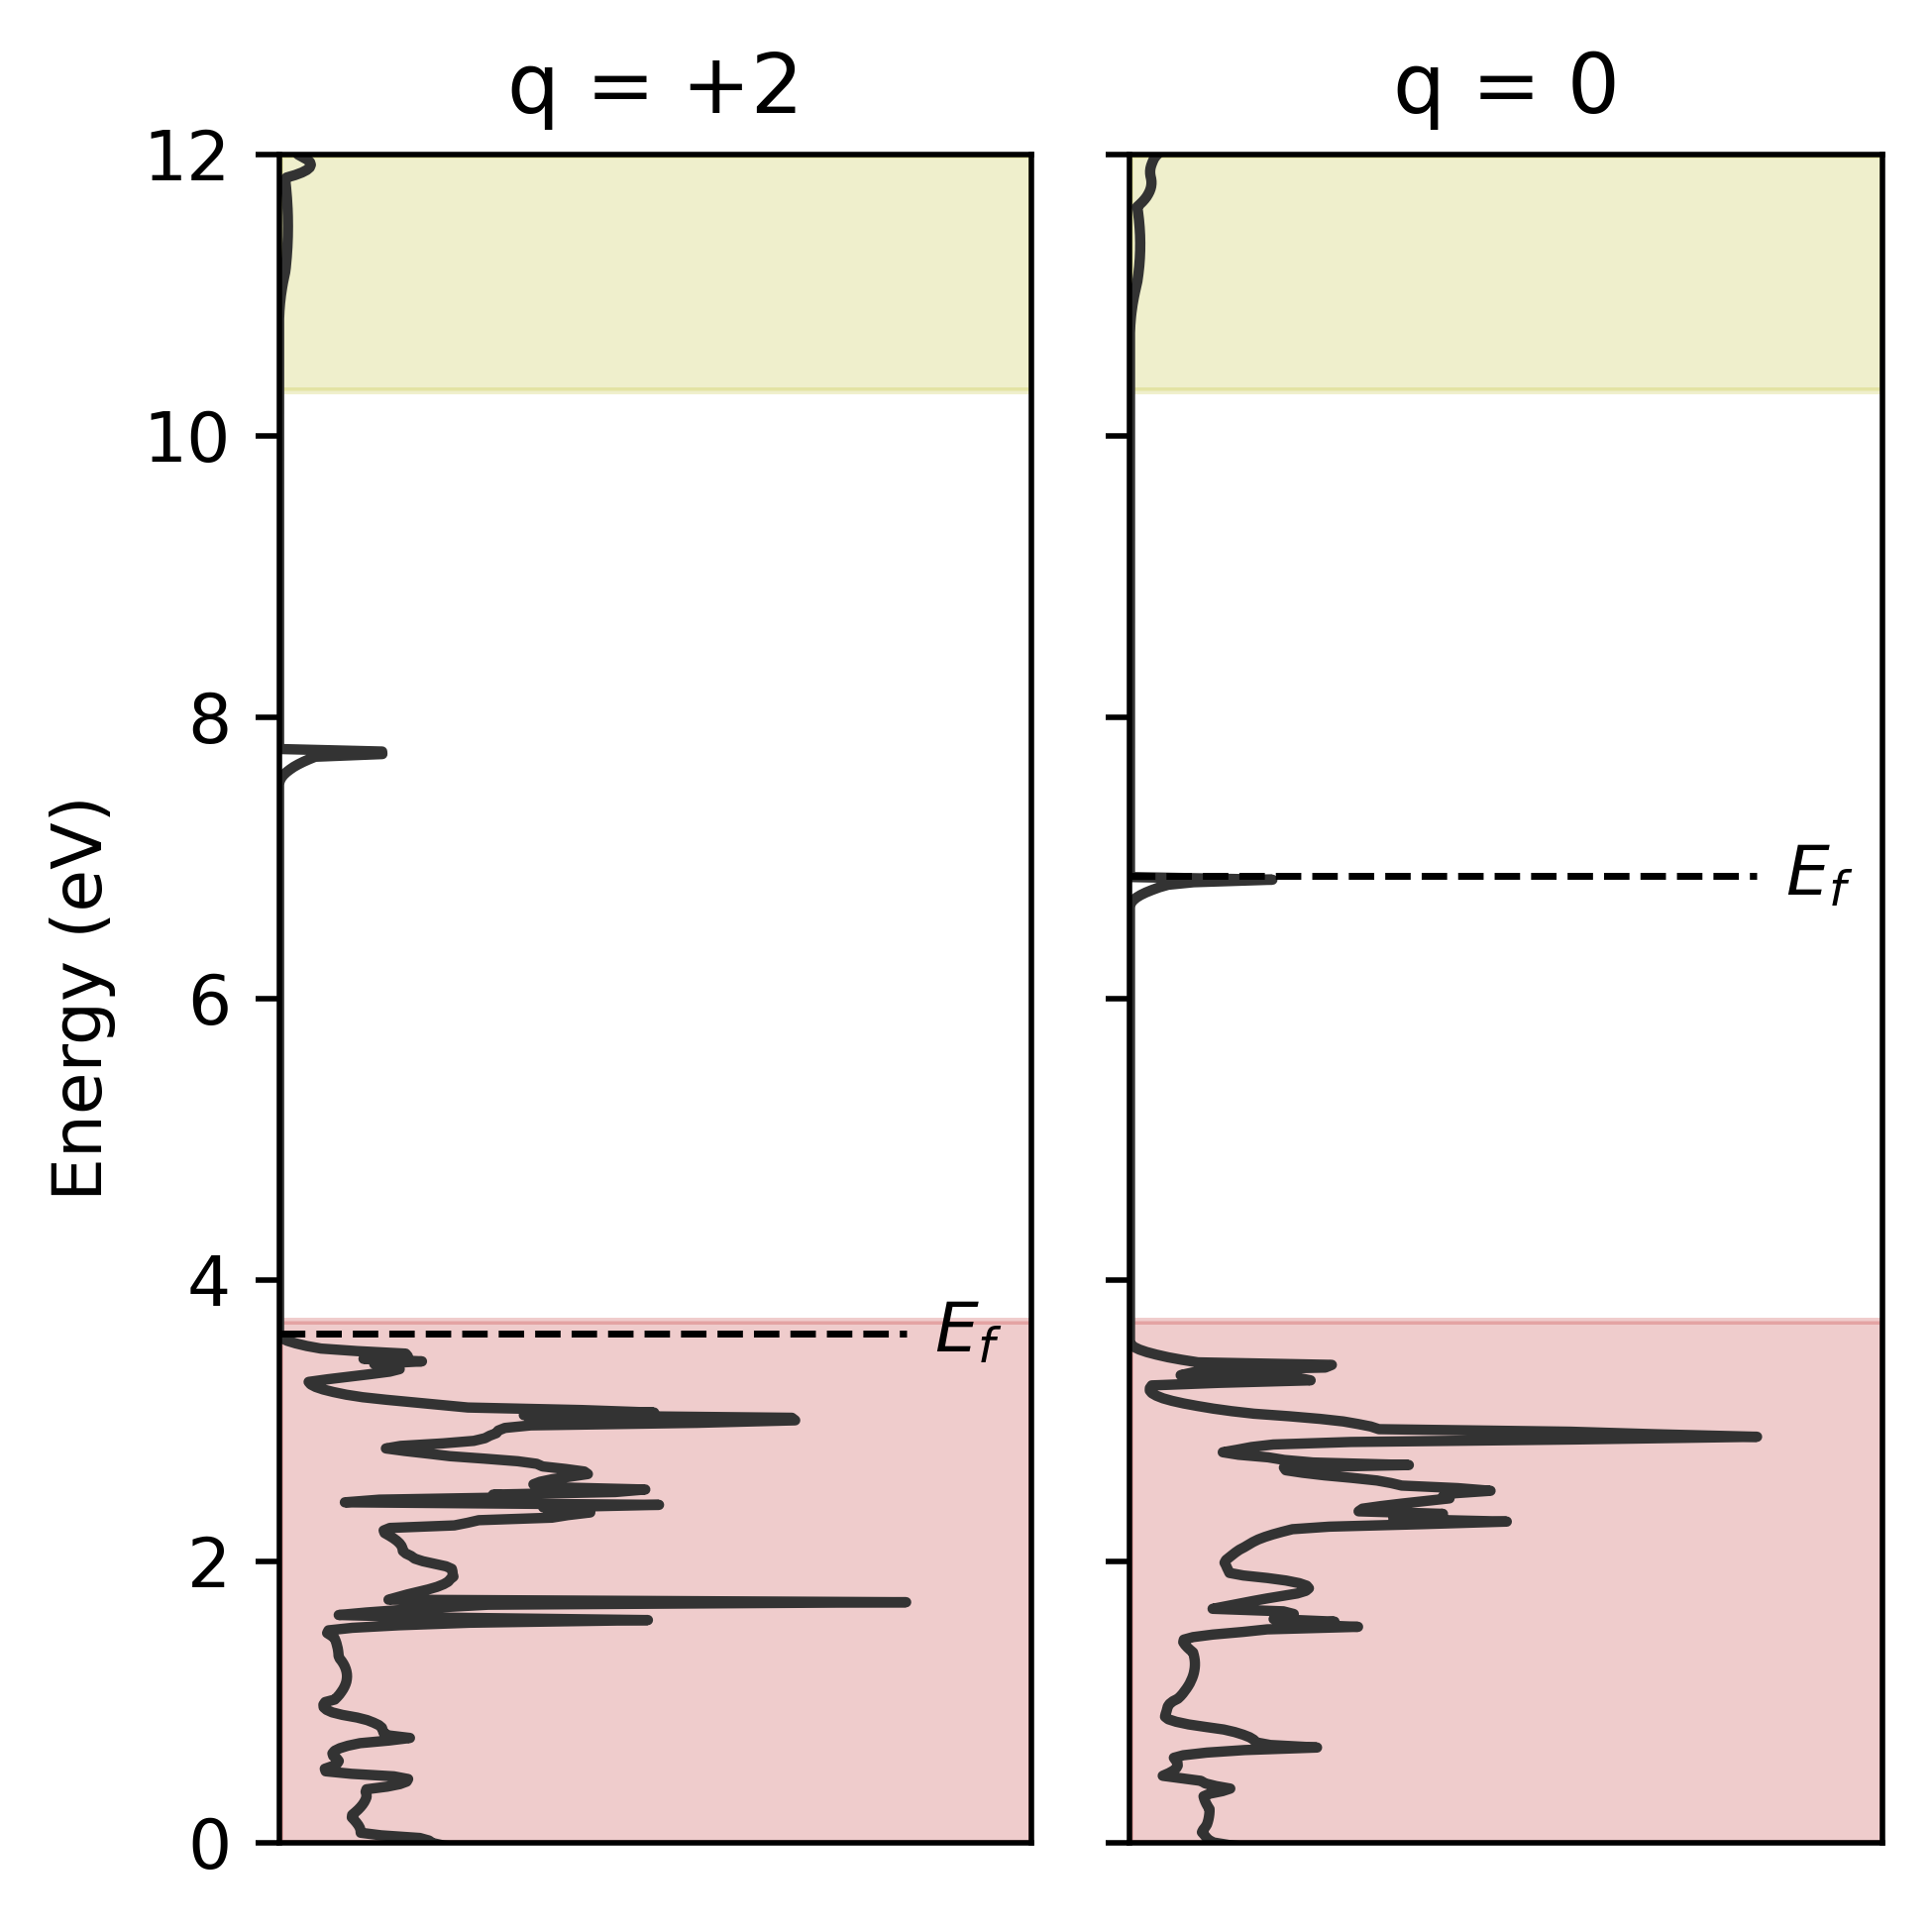

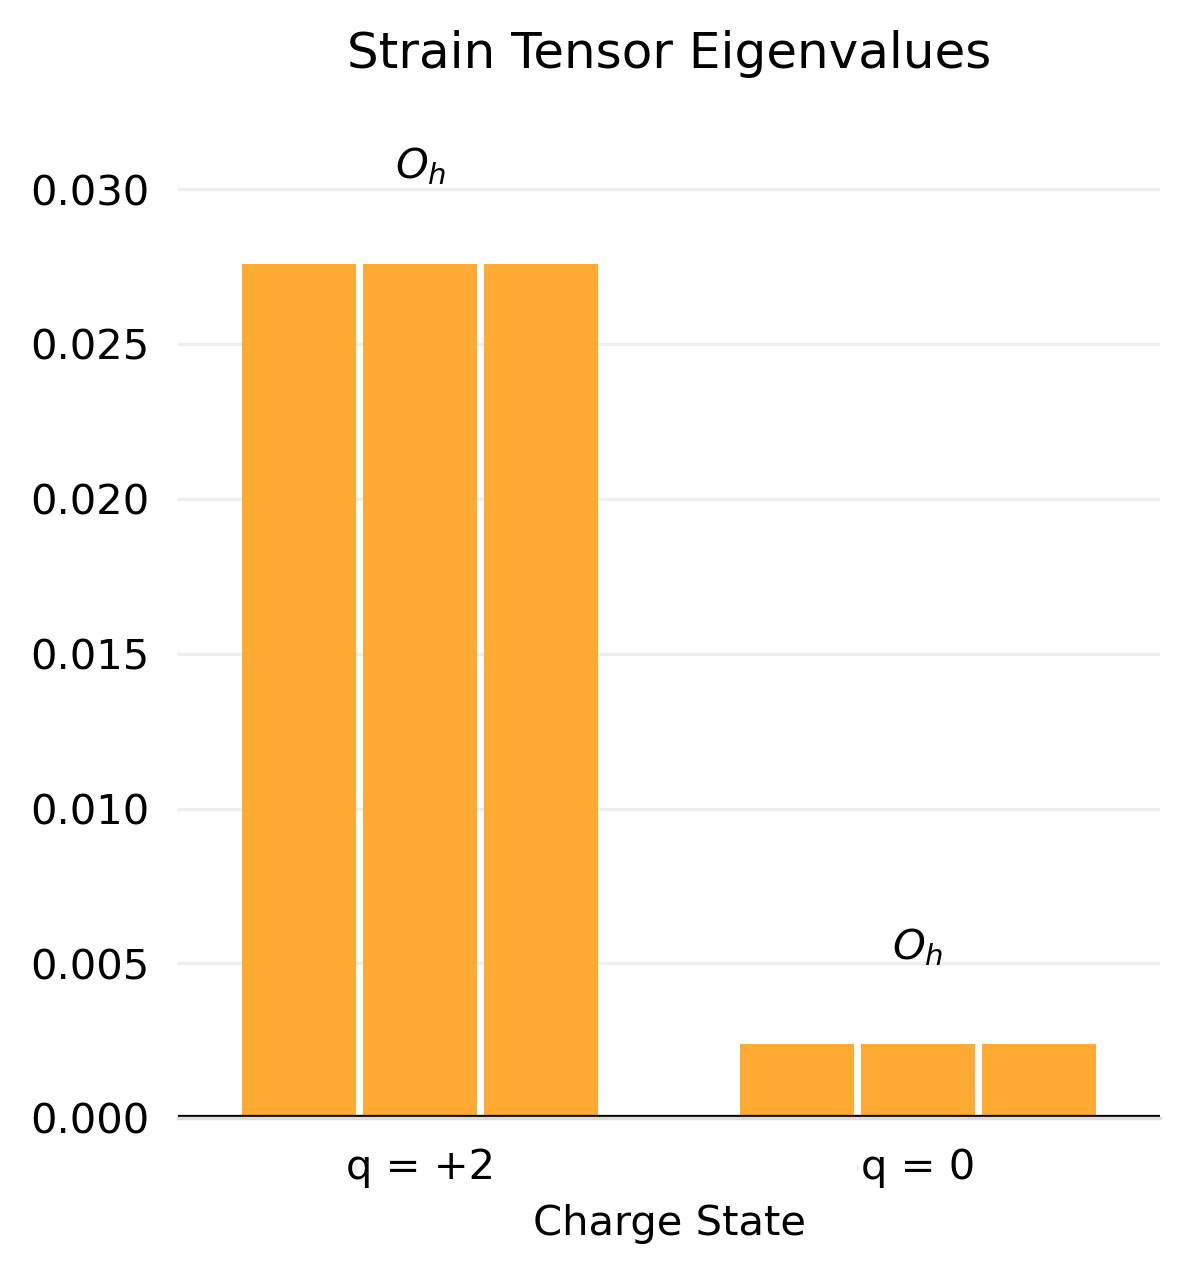

c:\Users\jorda\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


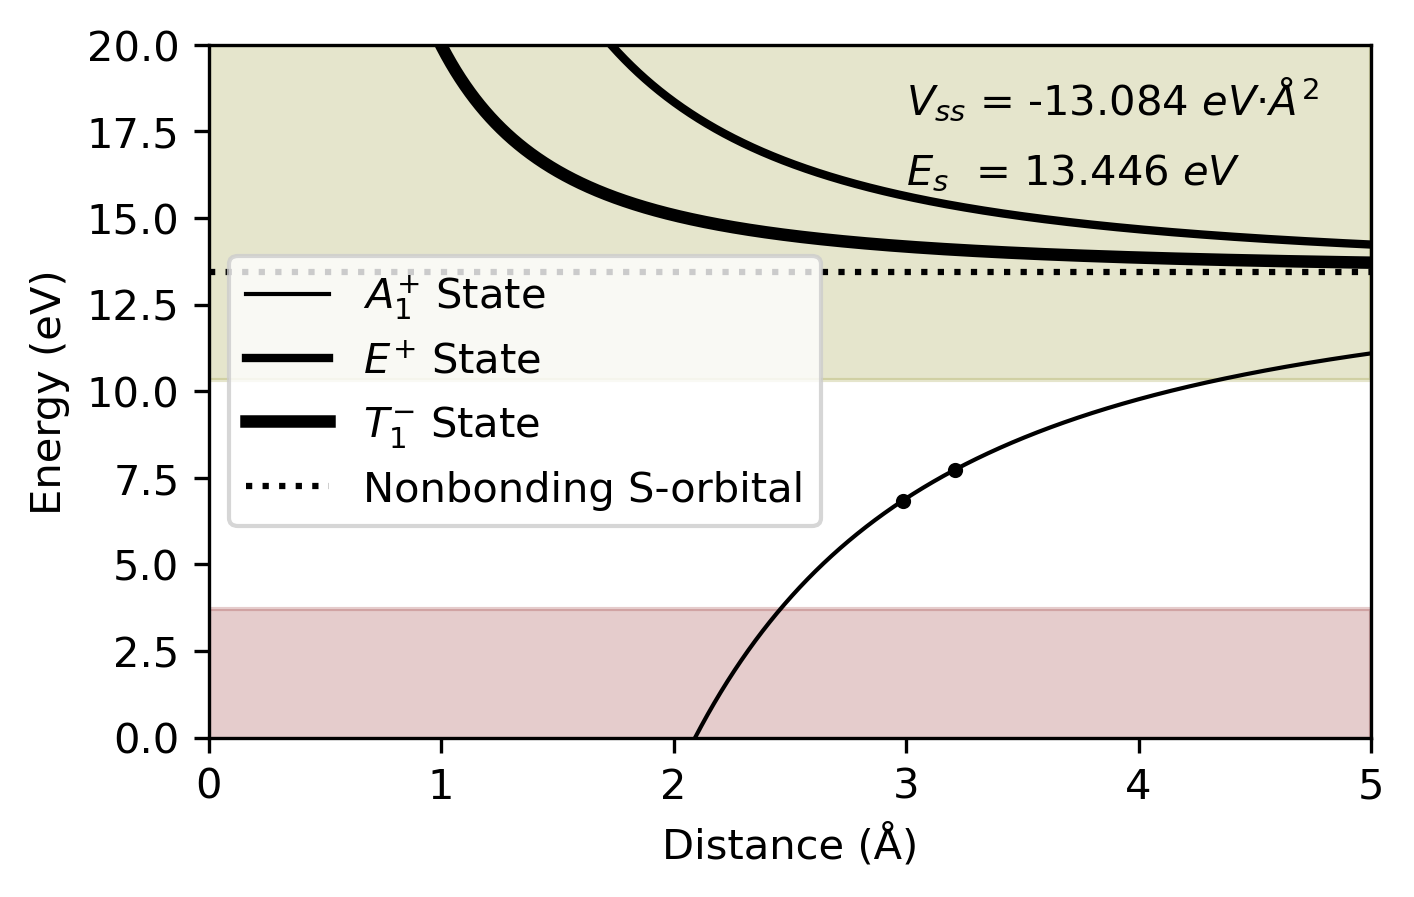

In [3]:
###########################
# Density of States Plots #
###########################
base = "DFT_Data/Sym/Oxygen_Vacancy/DOS/"
address_list = [ "q+2",   "q0"] 
label_list = ["q = +2", "q = 0"]
fermi_level_list = [3.62, 6.87]
doscar_plot(base, address_list, label_list, fermi_level_list, "Images/O_Vacancy_DOS.pdf")


############################
# Strain Tensor Bar Charts #
############################
reference = pd.read_csv("DFT_Data/Sym/Oxygen_Vacancy/POS/reference", delim_whitespace=True)
qplus2_pos = pd.read_csv("DFT_Data/Sym/Oxygen_Vacancy/POS/q+2", delim_whitespace=True)
q0_pos = pd.read_csv("DFT_Data/Sym/Oxygen_Vacancy/POS/q0", delim_whitespace=True)
pos_list = [qplus2_pos, q0_pos]
label_list = ["q = +2", "q = 0"]
defect_pos = lattice_constant*np.array([0.50, 0.750, 0.50])
ref_pos = (lattice_constant*np.array(reference["X"]), 
           lattice_constant*np.array(reference["Y"]), 
           lattice_constant*np.array(reference["Z"]))
strain_tensor_bar(pos_list, label_list, defect_pos, ref_pos, "Images/O_Vacancy")


##############################
# Tight Binding Energy Model #
##############################
def defect_state_energies(address, E_VBM, E_CBM):
    """return the energies of the defect trapped states"""
    data = pd.read_csv(address, delim_whitespace=True)
    dos = np.array(data["DOS"])
    energy = np.array(data["Energy"])
    band_gap_indices = (energy > E_VBM) * (energy < E_CBM)
    band_gap_dos = dos[band_gap_indices]
    band_gap_energy =  energy[band_gap_indices]
    peaks, properties = find_peaks(band_gap_dos, distance=12)
    return band_gap_energy[peaks]

def O_Vacancy_Hamiltonian(d, Es, Vss):
    x = (1/d)**2
    d1 = 0.5
    H =  np.array([[      Es,    Vss*x, d1*Vss*x,   Vss*x,     Vss*x,    Vss*x], 
                   [   Vss*x,       Es,    Vss*x, d1*Vss*x,    Vss*x,    Vss*x], 
                   [d1*Vss*x,    Vss*x,       Es,    Vss*x,    Vss*x,    Vss*x], 
                   [   Vss*x, d1*Vss*x,    Vss*x,       Es,    Vss*x,    Vss*x], 
                   [   Vss*x,    Vss*x,    Vss*x,    Vss*x,       Es, d1*Vss*x], 
                   [   Vss*x,    Vss*x,    Vss*x,    Vss*x, d1*Vss*x,       Es]], dtype=np.float64)
    return H

def hamiltonian_energies(d, Es, Vss):
    H = O_Vacancy_Hamiltonian(d, Es, Vss)
    energies, eigstates = np.linalg.eig(H)
    energies, eigstates = np.around(energies.real, 8), np.around(eigstates.real, 8)
    indices = np.argsort(energies)
    energies, eigstates = energies[indices], eigstates[:, indices]
    unique_energies = np.unique(energies)
    energy_dict = dict()
    for energy in unique_energies:
        u_indices = np.argwhere(energy == energies).flatten()
        energy_dict[energy] = eigstates[:, u_indices]
    return energy_dict


def singlet_eigen_energy(dlist, Es, Vss):
    energy_list = np.zeros_like(dlist)
    for i, d in enumerate(dlist):
        energy_dict = hamiltonian_energies(d, Es, Vss)
        for energy, eigstates in energy_dict.items():
            if eigstates.shape[1] == 1:
                energy_list[i] = energy
    return energy_list
        
    
def doublet_eigen_energy(dlist, Es, Vss):
    energy_list = np.zeros_like(dlist)
    for i, d in enumerate(dlist):
        energy_dict = hamiltonian_energies(d, Es, Vss)
        for energy, eigstates in energy_dict.items():
            if eigstates.shape[1] == 2:
                energy_list[i] = energy
    return energy_list

def triplet_eigen_energy(dlist, Es, Vss):
    energy_list = np.zeros_like(dlist)
    for i, d in enumerate(dlist):
        energy_dict = hamiltonian_energies(d, Es, Vss)
        for energy, eigstates in energy_dict.items():
            if eigstates.shape[1] == 3:
                energy_list[i] = energy
    return energy_list


        
avg_edge_lengths = []
energy_list = []
for i, pos in enumerate(pos_list):
    
    atomic_pos = (lattice_constant*np.array(pos["X"]), 
                  lattice_constant*np.array(pos["Y"]), 
                  lattice_constant*np.array(pos["Z"]))

    #Find the average edge length of the octahedron
    avg_edge_lengths.append(nearest_neighbor_distance(defect_pos, ref_pos, atomic_pos))
    #Find the DFT energies of the localized states from the peaks in the Density of States
    energy_list.append(defect_state_energies(base+address_list[i], 4.5, 10)[0])
    
avg_edge_lengths = np.array(avg_edge_lengths)
energy_list = np.array(energy_list)
    
### fitting the tight binding energy model ###
popt, pcov, infodict, mesg, ier = curve_fit(singlet_eigen_energy, avg_edge_lengths, energy_list, p0=[13, -10], full_output=True)
Es, Vss = popt

dlist = np.linspace(0.3, 5, 10000)
xlist = (1/dlist)**2
a1plus_energy_list = singlet_eigen_energy(dlist, Es, Vss)
eplus_energy_list =  doublet_eigen_energy(dlist, Es, Vss)
t1minus_energy_list =  triplet_eigen_energy(dlist, Es, Vss)
  
plt.figure(figsize=(5, 3), dpi=300)
plt.plot(dlist, a1plus_energy_list, label=r"$A^{+}_{1}$ State", c='k', linewidth=1)
plt.plot(dlist, eplus_energy_list, label=r"$E^{+}$ State", c='k', linewidth=2)
plt.plot(dlist, t1minus_energy_list, label=r"$T^{-}_{1}$ State", c='k', linewidth=3)
plt.plot([0, max(dlist)], [Es, Es], label="Nonbonding S-orbital", c='k', linestyle='dotted')
plt.fill_between([0, 5], -5, E_VBM, color=(0.5, 0, 0, 0.2))
plt.fill_between([0, 5], E_CBM, 20, color=(0.5, 0.5, 0, 0.2))
plt.scatter(avg_edge_lengths, energy_list, c='k', s=7)
plt.text(3, 16, r"$E_s$  = {E:.3f} $eV$".format(E = Es))
plt.text(3, 18, r"$V_{ss}$" + r" = {v:.3f} $eV · Å^2$ ".format(v=Vss))
plt.legend() 
plt.xlabel("Distance (Å)")
plt.ylabel("Energy (eV)")
plt.xlim(0, 5)
plt.ylim(0, 20)
plt.savefig("Images/O_Vacancy_energy.pdf", bbox_inches="tight")
plt.show()

oxygen_vacancy_energies = energy_list
oxygen_vacancy_dist = avg_edge_lengths

<h1>Magnesium Anti-site</h1>

<p>The Magnesium anti-site analysis builds off the work done for the Oxygen vacancy. The Magnesium anti-site defect can be understood as an Oxygen vacancy with a Magnesium atom located at the center of the octahedron. The molecular orbital structure of the Magnesium anti-site defect can be generated by considering the bonding and antibonding states formed from the central Magnesium atomic orbitals and the Oxygen vacancy SALCs. </p>

<p>Since the Magnesium atom resides in the Oxygen site, Magnesium P-orbitals will be considered. The S-orbital on the central Magnesium atom forms bonding and antibonding states with the singlet state composed of the S-orbitals located on the vertices of the Magnesium octahedron. The P-orbital on the central Magnesium atom likewise forms bonding and antibonding states with the triplet SALC generated from the octahedral S-orbitals. The doublet SALC formed from the octahedral S-orbitals is forbidden from participating in bonding due to symmetry so it represents a non-bonding state. </p>

<img src="Images/MO_Diagram_Cartoons/png_files/magnesium_antisite_mo_q+2.png"/>

<p>The singlet and triplet bonding states both reside in the band gap and thus both contribute to the observed charge state transitions. Furthermore, these two states provide a perfect illustration of Jahn-Teller distortions in the crystal lattice. As the singlet bonding state is filled and the charge state of the defect transitions from q = +4 to q = +2. The strain tensor bar chart shows that no reduction in symmetry occurs. Both states maintain octahedral symmetry. However, when the triplet bonding state is filled with a single electron pair upon the charge state transition from q = +2 to q = 0 a reduction in symmetry occurs. This change is symmetry provides a lower energy state for electron pair in exchange for a doublet of higher energy states which are unfilled. This can be seen most clearly in the molecular orbital plot which is generated from the fitted Hamiltonian. When the triplet state is completely filled and the defect transitions to a q = -4 charge state the cubic symmetry is restored. The strain tensor bar chart therefore provides great evidence for the degeneracy of states in the band gap and demonstrates the local symmetry breaking effect of Jahn-Teller distortions. </p>

<img src="Images/MO_Diagram_Cartoons/png_files/magnesium_antisite_mo.png"/>

The tight-binding Hamiltonian was fit in a similar manner to the Oxygen vacancy Hamiltonian. It made use of four parameters. The $E_s$ and $V_{ss}$ parameters which performed exactly the same function as before and two new parameters $E_p$ and $V_{sp}$. $E_p$ provides the energy of P-orbitals in the limit of no interatomic interaction much like the $E_s$ parameter. $V_{sp}$ measures the strength of the interaction between S-orbitals and P-orbitals much like the $V_{ss}$. The Hamiltonian was fit by taking the value of the $E_{ss}$ from the Oxygen vacancy calculation and treating the rest of the parameters as unknowns. This tight binding Hamiltonian has the following form.



$$ 
\begin{bmatrix} 
               E_s &                    0 &                  0 &        0 &  \frac{2V_{ss}}{d^2} & \frac{2V_{ss}}{d^2} & \frac{2V_{ss}}{d^2} & \frac{2V_{ss}}{d^2} &  \frac{2V_{ss}}{d^2} & \frac{2V_{ss}}{d^2} \\

                 0 &                  E_p &                  0 &        0 & \frac{-2V_{sp}}{d^2} &                   0 & \frac{2V_{sp}}{d^2} &                   0 &                    0 &                   0 \\

                 0 &                    0 &                E_p &        0 &                    0 &\frac{-2V_{sp}}{d^2} &                   0 & \frac{2V_{sp}}{d^2} &                    0 &                   0 \\

                 0 &                    0 &                  0 &      E_p &                    0 &                   0 &                   0 &                   0 & \frac{-2V_{sp}}{d^2} & \frac{2V_{sp}}{d^2} \\


\frac{2V_{ss}}{d^2} &\frac{-2V_{sp}}{d^2} &                   0 &        0 &   E_s                 &  \frac{V_{ss}}{d^2} & \frac{V_{ss}}{2d^2} & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}\\

\frac{2V_{ss}}{d^2} &                   0 &\frac{-2V_{sp}}{d^2} &        0 &  \frac{V_{sp}}{d^2}  & E_s                 & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{2d^2} & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}\\

\frac{2V_{ss}}{d^2} &\frac{2V_{sp}}{d^2}  &                   0 &      0 &  \frac{V_{ss}}{2d^2} & \frac{V_{ss}}{d^2}  & E_s                 & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}\\
\frac{2V_{ss}}{d^2} &                   0 & \frac{2V_{sp}}{d^2} &      0 &  \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{2d^2} & \frac{V_{ss}}{d^2}  & E_s                 & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}\\
\frac{2V_{ss}}{d^2} &                   0 &                   0 &\frac{-2V_{sp}}{d^2} &  \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}  & E_s                 & \frac{V_{ss}}{2d^2}\\
\frac{2V_{ss}}{d^2} &                   0 &                   0 &\frac{2V_{sp}}{d^2}&  \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{d^2}  & \frac{V_{ss}}{2d^2} & E_s                \\   

\end{bmatrix}
$$

In order to speed up the calculations and provide numerical stability for the least squares regression the analytical form of the singlet and triplet bonding state eigenvalues were used in the fit. They are as follows. 

$$A_1^+ Energies$$

$$a = E_s,  b = \frac{12V_{ss}}{d^2},  c = \frac{2V_{ss}}{d^2},  d = E_s + \frac{4V_{ss}}{d^2} + \frac{V_{ss}}{2d^2}$$

$$E_1 = \frac{1}{2}(a + d  - \sqrt{4bc + (a - d)^2}) $$

$$E_2 = \frac{1}{2}(a + d  + \sqrt{4bc + (a - d)^2}) $$

$$T_1^- Energies$$

$$a = \frac{2V_{sp}}{d^2}, b = E_s - \frac{V_{ss}}{2d^2}$$

$$E_1 = \frac{1}{2}(b + E_p  - \sqrt{8a^2 + (b - E_p)^2}) $$

$$E_2 = \frac{1}{2}(b + E_p  + \sqrt{8a^2 + (b - E_p)^2}) $$

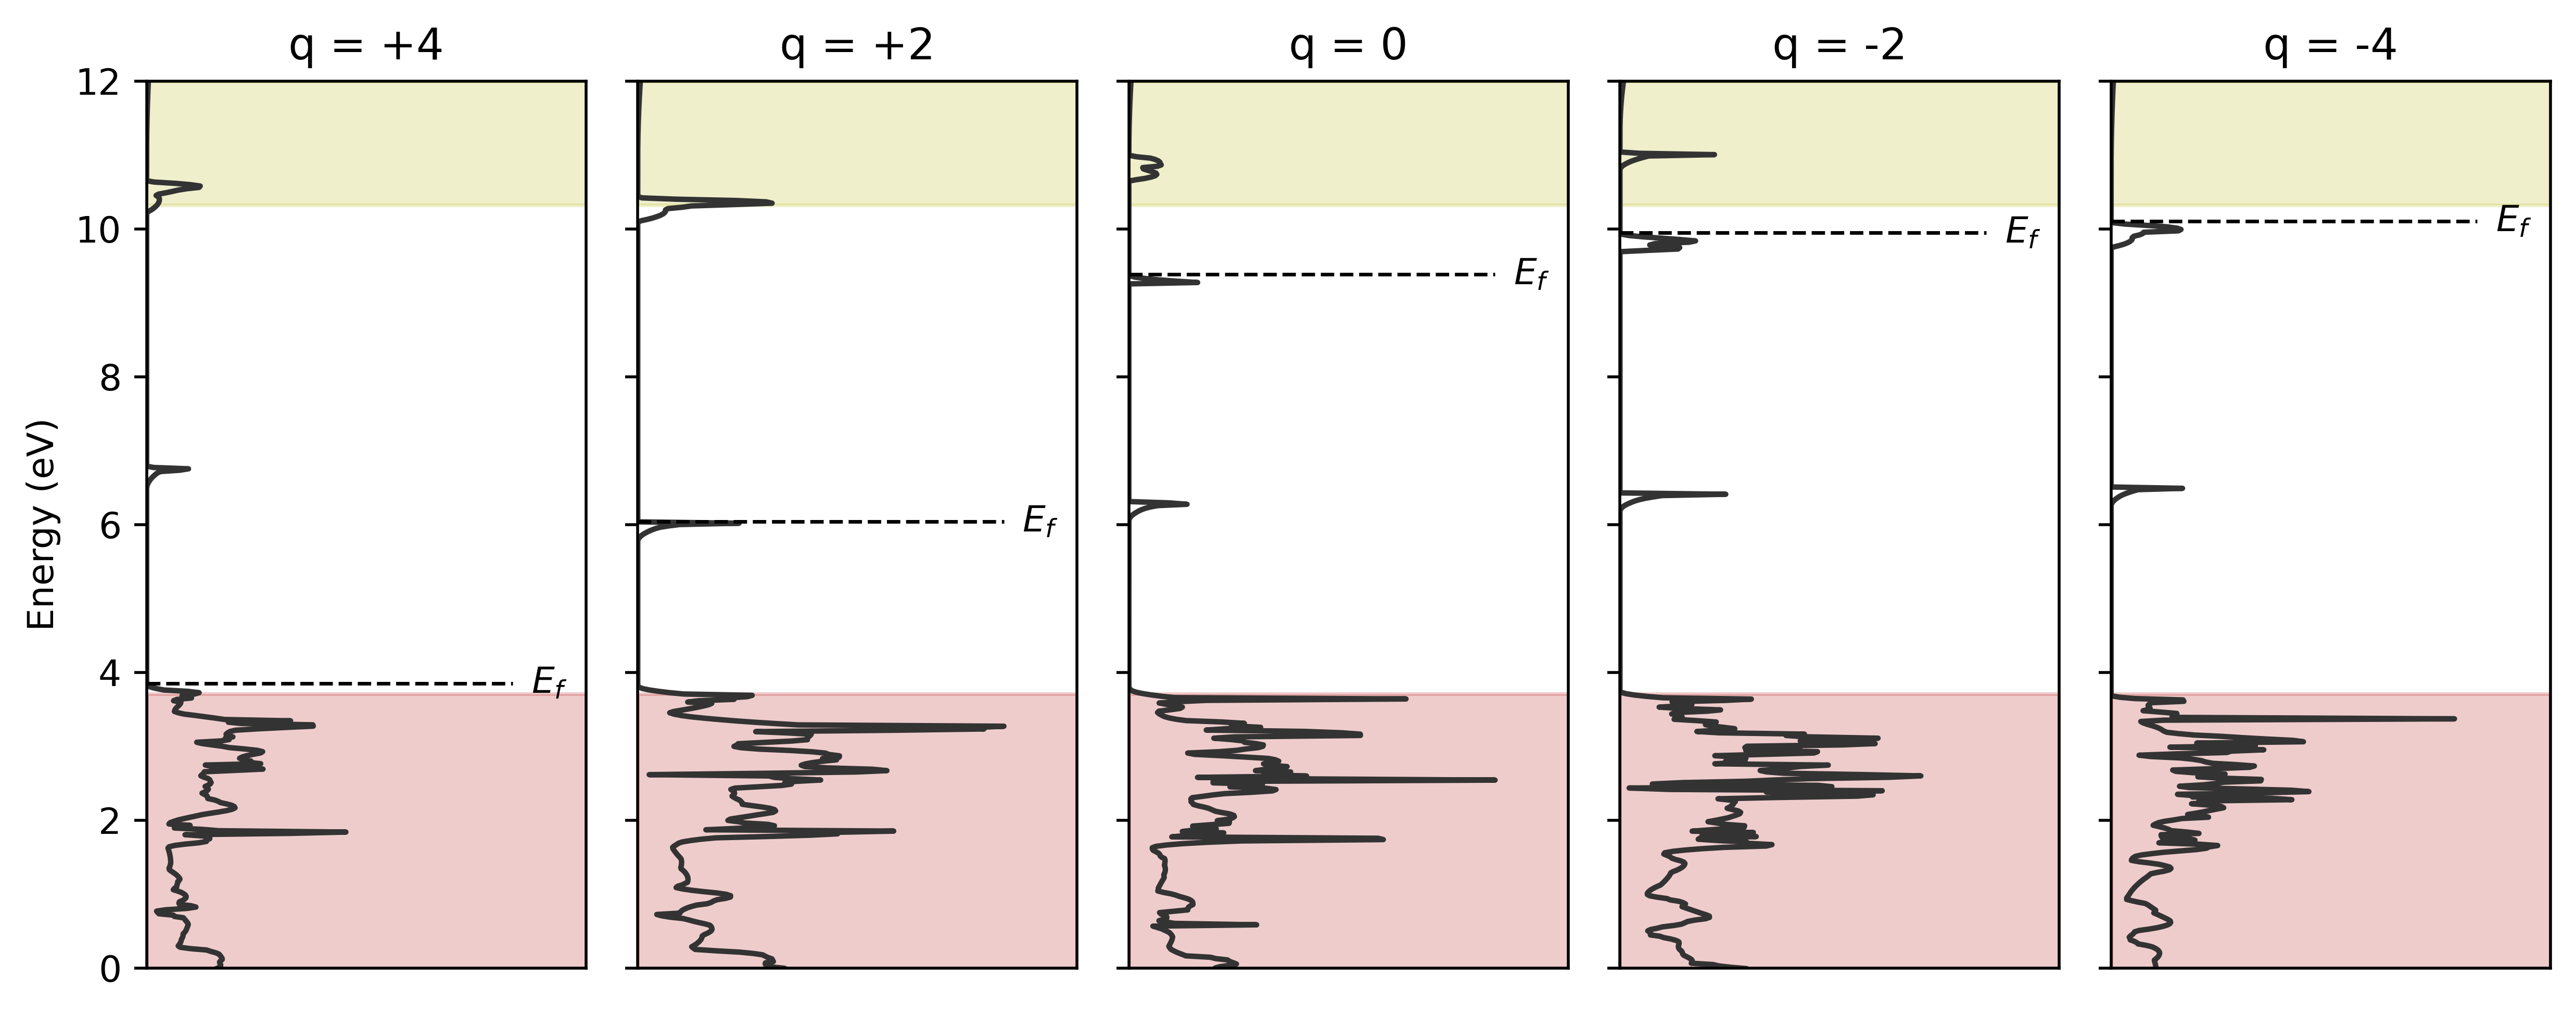

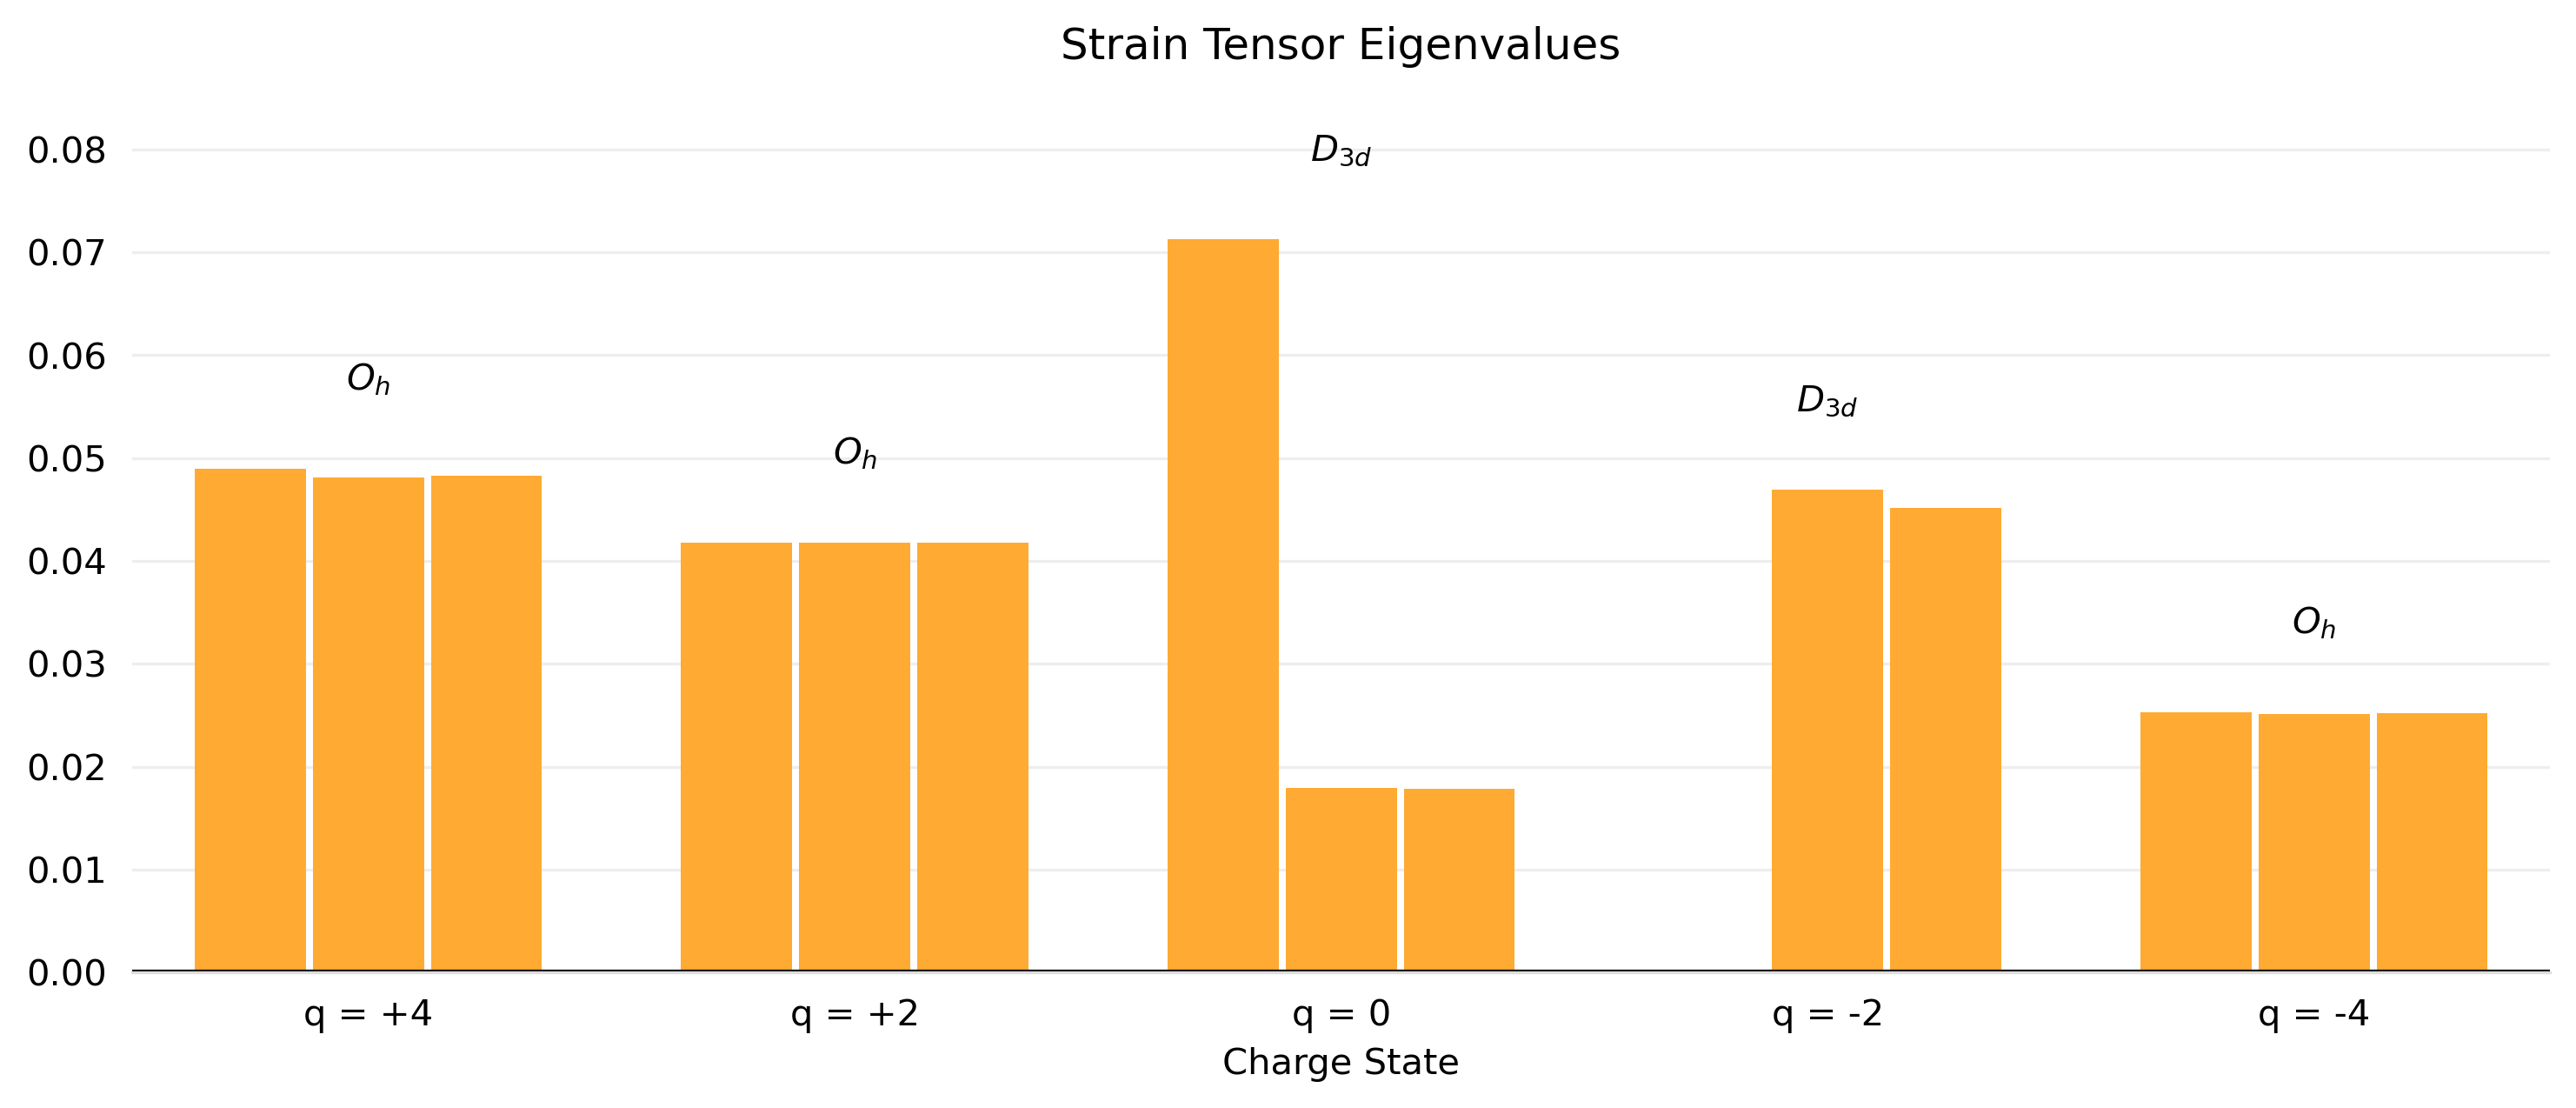

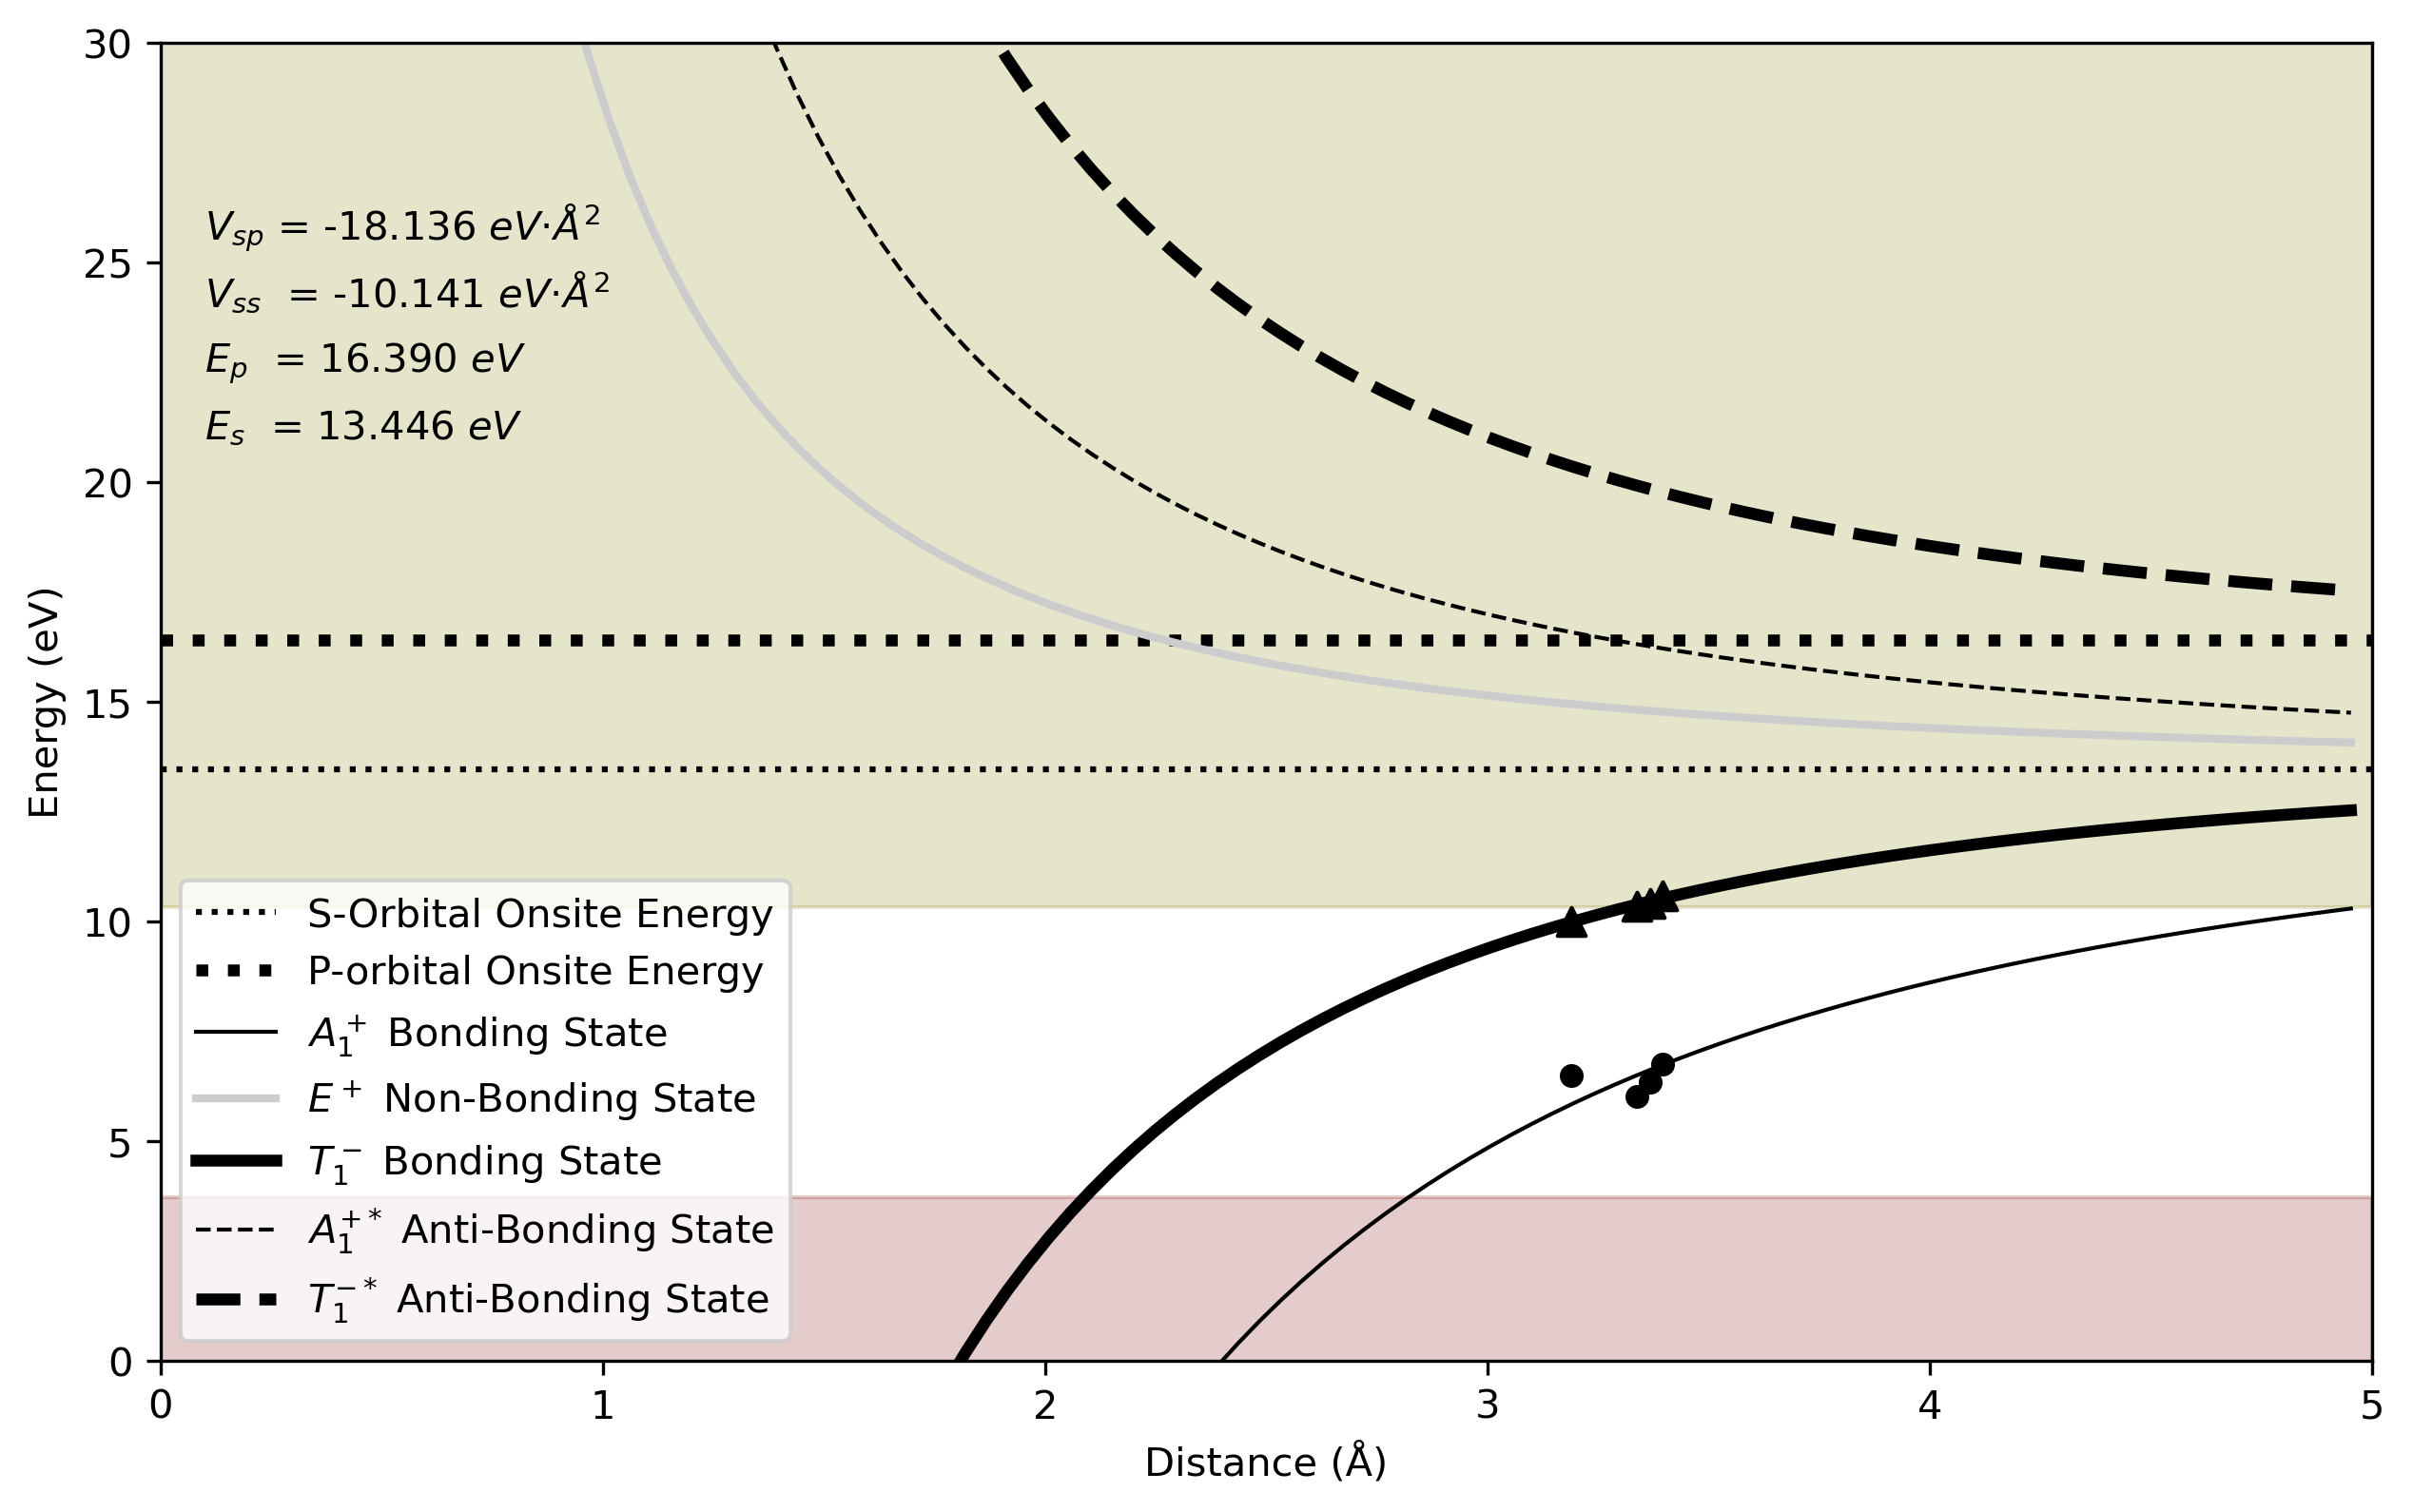

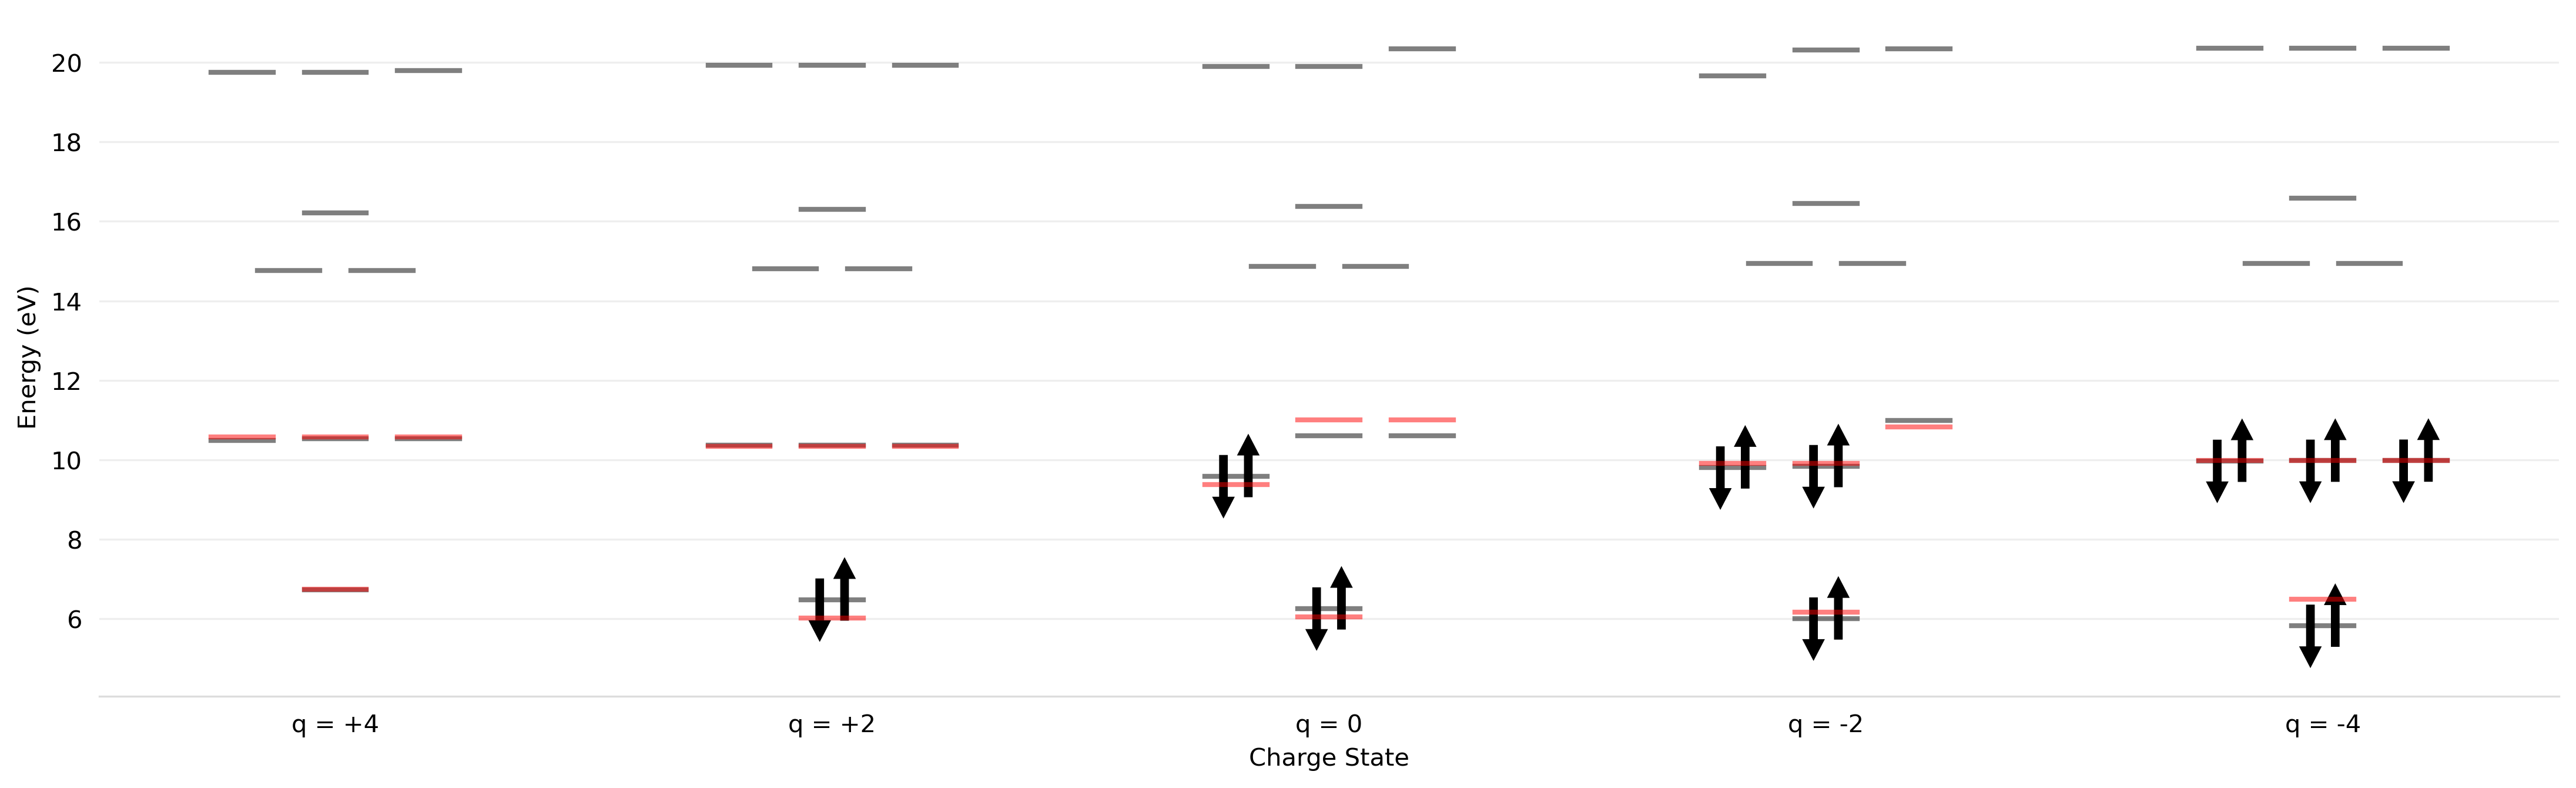

In [4]:
warnings.filterwarnings('ignore')

########################################################################
#Density of States Plot
########################################################################
base = "DFT_Data/No_Sym/Magnesium_Antisite/DOS/"
address_list = [ "q+4", "q+3", "q+2", "q+1", "q0", "q-1", "q-2", "q-3", "q-4"]
even_address_list = [address for i, address in enumerate(address_list) if i%2==0 ]
label_list = ["q = +4", "q +3", "q = +2", "q +1", "q = 0", "q = -1", "q = -2", "q -3", "q = -4"]
even_label_list = [label for i, label in enumerate(label_list) if i%2==0 ]
fermi_level_data = pd.read_csv(base+"Fermi_Level.txt", delim_whitespace=True)
even_fermi_level_list = list(fermi_level_data["Fermi_Level"][[0, 2, 4, 6, 8]])
doscar_plot(base, even_address_list, even_label_list, even_fermi_level_list, "Images/Mg_Antisite_DOS.pdf")



############################
# Strain Tensor Bar Charts #
############################
reference = pd.read_csv("DFT_Data/No_Sym/Magnesium_Antisite/POS/reference", delim_whitespace=True)
qplus4_pos = pd.read_csv("DFT_Data/No_Sym/Magnesium_Antisite/POS/q+4", delim_whitespace=True)
qplus3_pos = pd.read_csv("DFT_Data/No_Sym/Magnesium_Antisite/POS/q+3", delim_whitespace=True)
qplus2_pos = pd.read_csv("DFT_Data/No_Sym/Magnesium_Antisite/POS/q+2", delim_whitespace=True)
qplus1_pos = pd.read_csv("DFT_Data/No_Sym/Magnesium_Antisite/POS/q+1", delim_whitespace=True)
q0_pos = pd.read_csv("DFT_Data/No_Sym/Magnesium_Antisite/POS/q0", delim_whitespace=True)
qminus1_pos = pd.read_csv("DFT_Data/No_Sym/Magnesium_Antisite/POS/q-1", delim_whitespace=True)
qminus2_pos = pd.read_csv("DFT_Data/No_Sym/Magnesium_Antisite/POS/q-2", delim_whitespace=True)
qminus3_pos = pd.read_csv("DFT_Data/No_Sym/Magnesium_Antisite/POS/q-3", delim_whitespace=True)
qminus4_pos = pd.read_csv("DFT_Data/No_Sym/Magnesium_Antisite/POS/q-4", delim_whitespace=True)
defect_pos = lattice_constant*np.array([0.750, 0.50, 0.50])
pos_list = [qplus4_pos, qplus3_pos, qplus2_pos, qplus1_pos, q0_pos, qminus1_pos, qminus2_pos, qminus3_pos, qminus4_pos]
even_pos_list = [pos for i, pos in enumerate(pos_list) if i%2==0]
ref_pos = (lattice_constant*np.array(reference["X"]), 
           lattice_constant*np.array(reference["Y"]), 
           lattice_constant*np.array(reference["Z"]))
strain_tensor_bar(even_pos_list, even_label_list, defect_pos, ref_pos, "Images/Mg_Antisite")



########################################################################
#Tight Binding Hamiltonian Fitting
########################################################################
def a1plus_bond_sym(vec):
    if np.any(np.abs(np.std(vec[6:])/np.mean(vec[6:])) > 1):
        return False
    if np.any(np.abs(vec[1:4]) > 0.1):
        return False
    if (np.sign(vec[0]) != np.sign(vec[-1])):
        return False
    return True

def a1plus_antibond_sym(vec):
    if np.any(np.abs(np.std(vec[6:])/np.mean(vec[6:])) > 1):
        return False
    if np.any(np.abs(vec[1:4]) > 0.1):
        return False
    if (np.sign(vec[0]) == np.sign(vec[-1])):
        return False
    return True

def e_sym(vec):
    if np.all(np.abs(vec[:4]) < 0.1):
        return True
    else:
        return False

def t1minus_bond_sym(vec):
    if np.sign(vec[4]) == np.sign(vec[6]) and np.abs(vec[4]) > 0.0001 and np.abs(vec[6]) > 0.0001:
        return False
    if np.sign(vec[5]) == np.sign(vec[7]) and np.abs(vec[5]) > 0.0001 and np.abs(vec[7]) > 0.0001:
        return False
    if np.sign(vec[8]) == np.sign(vec[9]) and np.abs(vec[8]) > 0.0001 and np.abs(vec[9]) > 0.0001:
        return False
    if np.sign(vec[1]) == np.sign(vec[4]) and np.abs(vec[1]) > 0.0001 and np.abs(vec[4]) > 0.0001:
        return False
    if np.sign(vec[2]) == np.sign(vec[5]) and np.abs(vec[2]) > 0.0001 and np.abs(vec[5]) > 0.0001:
        return False
    if np.sign(vec[3]) == np.sign(vec[8]) and np.abs(vec[3]) > 0.0001 and np.abs(vec[8]) > 0.0001:
        return False
    return True

def t1minus_antibond_sym(vec):
    if np.sign(vec[4]) == np.sign(vec[6]) and np.abs(vec[4]) > 0.0001 and np.abs(vec[6]) > 0.0001:
        return False
    if np.sign(vec[5]) == np.sign(vec[7]) and np.abs(vec[5]) > 0.0001 and np.abs(vec[7]) > 0.0001:
        return False
    if np.sign(vec[8]) == np.sign(vec[9]) and np.abs(vec[8]) > 0.0001 and np.abs(vec[9]) > 0.0001:
        return False
    if np.sign(vec[1]) != np.sign(vec[4]) and np.abs(vec[1]) > 0.0001 and np.abs(vec[4]) > 0.0001:
        return False
    if np.sign(vec[2]) != np.sign(vec[5]) and np.abs(vec[2]) > 0.0001 and np.abs(vec[5]) > 0.0001:
        return False
    if np.sign(vec[3]) != np.sign(vec[8]) and np.abs(vec[3]) > 0.0001 and np.abs(vec[8]) > 0.0001:
        return False
    return True

def symmetric_distance_matrix(d):
    a = 2./np.sqrt(2)
    b = 1./np.sqrt(2)
    dist_mat = np.array([[ 0., b*d, b*d, b*d, b*d, b*d, b*d],
                         [ 0.,  0.,   d, a*d,   d,   d,   d],
                         [ 0.,  0.,  0.,   d, a*d,   d,   d],
                         [ 0.,  0.,  0.,  0.,   d,   d,   d],
                         [ 0.,  0.,  0.,  0.,  0.,   d,   d],
                         [ 0.,  0.,  0.,  0.,  0.,  0., a*d],
                         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=np.float64)
    dist_mat += dist_mat.T
    return dist_mat

def symmetric_sp_angle():
    a = np.array([[0., -1., 0., 1., 0., 0., 0.],
                  [0., 0.,-1., 0.,  1., 0., 0.],
                  [0., 0., 0., 0.,  0.,-1., 1.]])
    return a


def Mg_Antisite_Hamiltonian(dist_mat, sp_proj, Es, Vss, Ep, Vsp, Vm):
    Vm = 0
    x = (1/dist_mat)**2
    H = np.array([[Es+Vm,    0,    0,    0,                 x[0,1]*Vss,              x[0,2]*Vss,              x[0,3]*Vss,              x[0,4]*Vss,              x[0,5]*Vss,              x[0,6]*Vss],                        
                  [    0,   Ep,    0,    0,    sp_proj[0,1]*x[0,1]*Vsp, sp_proj[0,2]*x[0,2]*Vsp, sp_proj[0,3]*x[0,3]*Vsp, sp_proj[0,4]*x[0,4]*Vsp, sp_proj[0,5]*x[0,5]*Vsp, sp_proj[0,6]*x[0,6]*Vsp],               
                  [    0,    0,   Ep,    0,    sp_proj[1,1]*x[0,1]*Vsp, sp_proj[1,2]*x[0,2]*Vsp, sp_proj[1,3]*x[0,3]*Vsp, sp_proj[1,4]*x[0,4]*Vsp, sp_proj[1,5]*x[0,5]*Vsp, sp_proj[1,6]*x[0,6]*Vsp],
                  [    0,    0,    0,   Ep,    sp_proj[2,1]*x[0,1]*Vsp, sp_proj[2,2]*x[0,2]*Vsp, sp_proj[2,3]*x[0,3]*Vsp, sp_proj[2,4]*x[0,4]*Vsp, sp_proj[2,5]*x[0,5]*Vsp, sp_proj[2,6]*x[0,6]*Vsp],                  
                  
                  [    0,    0,    0,    0,                         Es,              x[1,2]*Vss,              x[1,3]*Vss,              x[1,4]*Vss,              x[1,5]*Vss,              x[1,6]*Vss], 
                  [    0,    0,    0,    0,                          0,                      Es,              x[2,3]*Vss,              x[2,4]*Vss,              x[2,5]*Vss,              x[2,6]*Vss], 
                  [    0,    0,    0,    0,                          0,                       0,                      Es,              x[3,4]*Vss,              x[3,5]*Vss,              x[3,6]*Vss], 
                  [    0,    0,    0,    0,                          0,                       0,                       0,                      Es,              x[4,5]*Vss,              x[4,6]*Vss], 
                  [    0,    0,    0,    0,                          0,                       0,                       0,                       0,                      Es,              x[5,6]*Vss], 
                  [    0,    0,    0,    0,                          0,                       0,                       0,                       0,                       0,                      Es]],
                  dtype=np.float64)
    H += H.T
    for i in range(10):
        H[i, i] *= 0.5
    return H
    
def Mg_Antisite_Energies(dist_mat, sp_proj, Es, Vss, Ep, Vsp, Vm):
    H = Mg_Antisite_Hamiltonian(dist_mat, sp_proj, Es, Vss, Ep, Vsp, Vm)
    energies, eigstates = np.linalg.eig(H)
    energies, eigstates = energies.real, eigstates.real
    indices = np.argsort(energies)
    energies, eigstates = energies[indices], eigstates[:, indices]
    cols = eigstates.shape[1]
    
    state_dict = {
        "a1plus" :  {"Energies" : [],
                     "States"   : []},
        "a1plus*" : {"Energies" : [],
                     "States"   : []},
        "eplus" :   {"Energies" : [],
                     "States"   : []},        
        "t1minus" : {"Energies" : [],
                     "States"   : []},
        "t1minus*" :{"Energies" : [],
                     "States"   : []}}
    rows, cols = eigstates.shape
    for col in range(cols):
        if a1plus_bond_sym(eigstates[:, col]):
            state_dict["a1plus"]["Energies"].append(energies[col])
            state_dict["a1plus"]["States"].append(eigstates[:, col])
        elif a1plus_antibond_sym(eigstates[:, col]):
            state_dict["a1plus*"]["Energies"].append(energies[col])
            state_dict["a1plus*"]["States"].append(eigstates[:, col])    
        elif t1minus_bond_sym(eigstates[:, col]):
            state_dict["t1minus"]["Energies"].append(energies[col])
            state_dict["t1minus"]["States"].append(eigstates[:, col])
        elif t1minus_antibond_sym(eigstates[:, col]):
            state_dict["t1minus*"]["Energies"].append(energies[col])
            state_dict["t1minus*"]["States"].append(eigstates[:, col])
        elif e_sym(eigstates[:, col]):
            state_dict["eplus"]["Energies"].append(energies[col])
            state_dict["eplus"]["States"].append(eigstates[:, col])
            
    l = []
    for key, value in state_dict.items():
        l.append(len(value['Energies']))
    return state_dict            

def energy_expectation_value(H, psi):
    psi = np.array(psi)
    psi /= np.sqrt(np.dot(psi, psi))
    return psi.T @ H @ psi

def non_outlier_indices(arr):
    return np.argwhere(np.abs(np.diff(arr)) < 5).flatten()

nn_indices = nearest_neighbor_indices(defect_pos, ref_pos)[[3,1,4,0,2,5]]
defect_index = get_atomic_index(defect_pos, ref_pos)

strain_eigenvalues = []
avg_edge_lengths = []
dist_mat_list = []
sp_proj_list = []
breathing_mode_a1plus = []
breathing_mode_t1minus = []
even_strain_eigenvalues = []
for i, pos in enumerate(pos_list):
    
    atomic_pos = (lattice_constant*np.array(pos["X"]), 
                  lattice_constant*np.array(pos["Y"]), 
                  lattice_constant*np.array(pos["Z"]))
        
    #strain calculations
    strain_tensor = generate_strain_tensor(defect_pos, atomic_pos, ref_pos)
    strain_eigenvalues += list(np.linalg.eigvals(strain_tensor))
    if i%2==0:
        even_strain_eigenvalues += list(np.linalg.eigvals(strain_tensor))
    #distance calculations
    avg_edge_lengths.append(nearest_neighbor_distance(defect_pos, ref_pos, atomic_pos))


    x, y, z = atomic_pos[0][nn_indices], atomic_pos[1][nn_indices], atomic_pos[2][nn_indices]
    x, y, z = np.insert(x, 0, atomic_pos[0][defect_index]), np.insert(y, 0, atomic_pos[1][defect_index]), np.insert(z, 0, atomic_pos[2][defect_index])
    sp_proj_mat = np.column_stack(difference_from_point((atomic_pos[0][defect_index], atomic_pos[1][defect_index], atomic_pos[2][defect_index]), (x, y, z))).T
    for col in range(sp_proj_mat.shape[1]):
        sp_proj_mat[:, col] /= np.sqrt(np.sum(sp_proj_mat[:, col]**2))
    sp_proj_list.append(sp_proj_mat)
    dist_mat_list.append(distance_matrix([x, y, z], defect_pos))
    
    if i in [0,1,2,8]:
        energies = defect_state_energies(base+address_list[i], 4, 12)
        breathing_mode_a1plus.append(energies[0])
        breathing_mode_t1minus.append(energies[1])

avg_edge_lengths = np.array(avg_edge_lengths)

energy_list = [np.array([6.753,  10.579, 10.579, 10.579]), 
               np.array([6.335,  10.403, 10.403, 10.403]),
               np.array([6.017,  10.347, 10.347, 10.347]),
               np.array([5.8567, 9.7854, 10.711, 10.716]),
               np.array([6.0455, 9.3761, 11.001, 11.002]),
               np.array([6.0793, 10.391, 10.815, 11.225]),
               np.array([6.1768, 9.9039, 9.9065, 10.823]),
               np.array([6.1923, 9.9588, 10.024, 10.601]),
               np.array([6.489,  9.991,  9.991,  9.991,])]


#The Vm, and Es fitting parameters are taken from the Oxygen Vacancy Energy Model fit
Vm = 0
Es = 13.446

def a1plus_bonding_energy(dist, Es, Vss, Vm):
    a = Es + Vm
    b = 12*Vss/(dist**2)
    c = 2*Vss/(dist**2)
    d = Es + (9*Vss/(2*dist**2))
    discriminant = np.sqrt(4*b*c + (a-d)**2)
    unnormalized_eigenvalue = 0.5*(a + d - discriminant)
    return unnormalized_eigenvalue 

def a1plus_antibonding_energy(dist, Es, Vss, Vm):
    a = Es + Vm
    b = 12*Vss/(dist**2)
    c = 2*Vss/(dist**2)
    d = Es + (9*Vss/(2*dist**2))
    discriminant = np.sqrt(4*b*c + (a-d)**2)
    unnormalized_eigenvalue = 0.5*(a + d + discriminant)
    return unnormalized_eigenvalue 

def t1minus_bonding_energy(dist, Es, Vss, Ep, Vsp):
    a = 2*Vsp/(dist**2)
    b = Es - (Vss/(2*(dist**2)))
    discriminant = np.sqrt(8*a**2 + b**2 -2*b*Ep + Ep**2)
    unnormalized_eigenvalue = 0.5*(b + Ep - discriminant)
    return unnormalized_eigenvalue 

def t1minus_antibonding_energy(dist, Es, Vss, Ep, Vsp):
    a = 2*Vsp/(dist**2)
    b = Es - (Vss/(2*(dist**2)))
    discriminant = np.sqrt(8*a**2 + b**2 -2*b*Ep + Ep**2)
    unnormalized_eigenvalue = 0.5*(b + Ep + discriminant)
    return unnormalized_eigenvalue 

def residual(params):
    res_list = []
    for i, dist_mat in enumerate(dist_mat_list):
        
        #Magnesium Antisite data with Oh or D3d Point Groups
        if i in [0, 1, 2, 8]:
            a1plus = a1plus_bonding_energy(avg_edge_lengths[i], Es, params[0], 0)
            t1minus = t1minus_bonding_energy(avg_edge_lengths[i],  Es, params[0], params[1], params[2])
            e_list = np.array([a1plus,t1minus])
            energy = np.array([energy_list[i][0], np.mean(energy_list[i][1:])])
            res_list.append(energy-e_list)
    
    res_list = np.concatenate(res_list)
            
    #Oxygen Vacancy Data
    for i, d in enumerate(oxygen_vacancy_dist):  
        dist_mat = symmetric_distance_matrix(d)
        sp_proj = symmetric_sp_angle()
        H = Mg_Antisite_Hamiltonian(dist_mat, sp_proj, Es, *params, 0)
        O_vac_energy = energy_expectation_value(H, [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.])
        np.insert(res_list, -1, O_vac_energy-oxygen_vacancy_energies[i])
    
    return res_list
        
r = np.random.random(3)
p0 = np.array([-13, 20, -30], dtype=np.float64)
results = least_squares(residual, r+p0)#, bounds=([-50, 0, -50], [0, 50, 0]))
Vss, Ep, Vsp = results['x']


##############################################################################################################################################
# Energy-Distance Plot
##############################################################################################################################################
dlist = np.linspace(0.3, 5, 100)
energy_dict_list = [Mg_Antisite_Energies(symmetric_distance_matrix(d), symmetric_sp_angle(), Es, Vss, Ep, Vsp, Vm) for d in dlist]
a1plus_bonding_energies = np.array([e_dict['a1plus']['Energies'][0] for e_dict in energy_dict_list])
a1plus_antibonding_energies = np.array([e_dict['a1plus*']['Energies'][0] for e_dict in energy_dict_list])
eplus_energies = np.array([np.mean(e_dict['eplus']['Energies']) for e_dict in energy_dict_list])
t1minus_bonding_energies = np.array([np.mean(e_dict['t1minus']['Energies']) for e_dict in energy_dict_list])
t1minus_antibonding_energies = np.array([np.mean(e_dict['t1minus*']['Energies']) for e_dict in energy_dict_list])

plt.figure(figsize=(10, 6), dpi=300)

breathing_mode_distance = avg_edge_lengths[[0,1, 2, 8]]

### Nonbonding States ###
plt.plot([0, max(dlist)], [Es, Es], label="S-Orbital Onsite Energy", c='k', linestyle='dotted')
plt.plot([0, max(dlist)], [Ep, Ep], label="P-orbital Onsite Energy", c='k', linestyle='dotted', linewidth=3)

### Bonding States ###
noi = non_outlier_indices(a1plus_bonding_energies)
plt.plot(dlist[noi], a1plus_bonding_energies[noi], label=r"$A_{1}^+$ Bonding State", c='k', linewidth=1)
noi = non_outlier_indices(eplus_energies)
plt.plot(dlist[noi], eplus_energies[noi], label=r"$E^+$ Non-Bonding State", c=(0.8, 0.8, 0.8), linewidth=2)
noi = non_outlier_indices(t1minus_bonding_energies)
plt.plot(dlist[noi], t1minus_bonding_energies[noi], label=r"$T_{1}^-$ Bonding State", c='k', linewidth=3)

### Anti-Bonding States ###
noi = non_outlier_indices(a1plus_antibonding_energies)
plt.plot(dlist[noi], a1plus_antibonding_energies[noi], label=r"$A_{1}^{+*}$ Anti-Bonding State", c='k', linewidth=1, linestyle='dashed')
noi = non_outlier_indices(t1minus_antibonding_energies)
plt.plot(dlist[noi], t1minus_antibonding_energies[noi], label=r"$T_{1}^{-*}$ Anti-Bonding State", c='k', linewidth=3, linestyle='dashed')

###  Bands ###
plt.fill_between([0, 5], -5, E_VBM, color=(0.5, 0, 0, 0.2))
plt.fill_between([0, 5], E_CBM, 30, color=(0.5, 0.5, 0, 0.2))

### DFT Data
plt.scatter(breathing_mode_distance, breathing_mode_a1plus, c='k', s=25)
plt.scatter(breathing_mode_distance, breathing_mode_t1minus, c='k', s=50, marker="^")

### Fitting Parameters
plt.text(0.1, 21, r"$E_s$  = {E:.3f} $eV$".format(E = Es))
plt.text(0.1, 22.5, r"$E_p$  = {E:.3f} $eV$".format(E = Ep))
plt.text(0.1, 24, r"$V_{ss}$" + r"  = {v:.3f} $eV · Å^2$".format(v = Vss))
plt.text(0.1, 25.5, r"$V_{sp}$" + r" = {v:.3f} $eV · Å^2$ ".format(v = Vsp))

plt.legend() 
plt.xlabel("Distance (Å)")
plt.ylabel("Energy (eV)")
plt.xlim(0, 5)
plt.ylim(0, 30)
plt.savefig("Images/Mg_Antisite_energy.pdf", bbox_inches="tight")
plt.show()
plt.close()

###########################################################################################################################
# MO Diagram
###########################################################################################################################
length = 1
def singlet(ax, xval, energy, color='k', filled=False, linestyle='solid'):
    ax.plot([xval-0.5*length, xval+0.5*length], [energy, energy], linewidth=2, c=color, alpha=0.5, linestyle=linestyle)
    if filled:
        ax.arrow(xval+0.2*length, energy-0.5*length, 0, length*1.5, width=0.1, color='k', length_includes_head=True)
        ax.arrow(xval-0.2*length, energy+0.5*length, 0,-length*1.5,  width=0.1, color='k', length_includes_head=True)
        
def doublet(ax, xval, energy, color='k', filling=[False, False], linestyle='solid'):
    singlet(ax, xval+0.75*length, energy[0], color, filled=filling[0], linestyle=linestyle)
    singlet(ax, xval-0.75*length, energy[1], color, filled=filling[1], linestyle=linestyle)
    
def triplet(ax, xval, energy, color='k', filling=[False, False, False], linestyle='solid'):
    singlet(ax, xval-1.5*length, energy[0], color , filled=filling[0], linestyle=linestyle)
    singlet(ax, xval, energy[1], color , filled=filling[1], linestyle=linestyle)
    singlet(ax, xval+1.5*length, energy[2], color , filled=filling[2], linestyle=linestyle)

group_spacing = 4
n = 9
xpos = np.arange(n)*group_spacing
even_label_list = []
even_xpos = []
for i in range(9):
    if i % 2 == 0:
        even_label_list.append(label_list[i])
        even_xpos.append(xpos[i])

fig, ax = plt.subplots(figsize=(int(2*n),5), dpi=300)

for i, dist_mat in enumerate(dist_mat_list):
    if i in [0, 2, 4, 6, 8]:
        if i == 0:
            e_dict = Mg_Antisite_Energies(dist_mat, sp_proj_list[i], Es, Vss, Ep, Vsp, Vm)
            singlet(ax, xpos[i], e_dict["a1plus"]["Energies"][0])
            singlet(ax, xpos[i], e_dict["a1plus*"]["Energies"][0])
            doublet(ax, xpos[i], e_dict["eplus"]["Energies"])
            triplet(ax, xpos[i], e_dict["t1minus"]["Energies"])
            triplet(ax, xpos[i], e_dict["t1minus*"]["Energies"])
            singlet(ax, xpos[i], energy_list[i][0], color='r')
            triplet(ax, xpos[i], energy_list[i][1:], color='r')
        if i == 2:
            e_dict = Mg_Antisite_Energies(dist_mat, sp_proj_list[i], Es, Vss, Ep, Vsp, Vm)
            singlet(ax, xpos[i], e_dict["a1plus"]["Energies"][0], filled=True)
            singlet(ax, xpos[i], e_dict["a1plus*"]["Energies"][0])
            doublet(ax, xpos[i], e_dict["eplus"]["Energies"])
            triplet(ax, xpos[i], e_dict["t1minus"]["Energies"])
            triplet(ax, xpos[i], e_dict["t1minus*"]["Energies"])
            singlet(ax, xpos[i], energy_list[i][0], color='r')
            triplet(ax, xpos[i], energy_list[i][1:], color='r')
        if i == 4:
            e_dict = Mg_Antisite_Energies(dist_mat, sp_proj_list[i], Es, Vss, Ep, Vsp, Vm)
            singlet(ax, xpos[i], e_dict["a1plus"]["Energies"][0], filled=True)
            singlet(ax, xpos[i], e_dict["a1plus*"]["Energies"][0])
            doublet(ax, xpos[i], e_dict["eplus"]["Energies"])
            triplet(ax, xpos[i], e_dict["t1minus"]["Energies"], filling=[True, False, False])
            triplet(ax, xpos[i], e_dict["t1minus*"]["Energies"])
            singlet(ax, xpos[i], energy_list[i][0], color='r')
            triplet(ax, xpos[i], energy_list[i][1:], color='r')
        if i == 6:
            e_dict = Mg_Antisite_Energies(dist_mat, sp_proj_list[i], Es, Vss, Ep, Vsp, Vm)
            singlet(ax, xpos[i], e_dict["a1plus"]["Energies"][0], filled=True)
            singlet(ax, xpos[i], e_dict["a1plus*"]["Energies"][0])
            doublet(ax, xpos[i], e_dict["eplus"]["Energies"])
            triplet(ax, xpos[i], e_dict["t1minus"]["Energies"], filling=[True, True, False])
            triplet(ax, xpos[i], e_dict["t1minus*"]["Energies"])
            singlet(ax, xpos[i], energy_list[i][0], color='r')
            triplet(ax, xpos[i], energy_list[i][1:], color='r')
        if i == 8:
            e_dict = Mg_Antisite_Energies(dist_mat, sp_proj_list[i], Es, Vss, Ep, Vsp, Vm)
            singlet(ax, xpos[i], e_dict["a1plus"]["Energies"][0], filled=True)
            singlet(ax, xpos[i], e_dict["a1plus*"]["Energies"][0])
            doublet(ax, xpos[i], e_dict["eplus"]["Energies"])
            triplet(ax, xpos[i], e_dict["t1minus"]["Energies"], filling=[True, True, True])
            triplet(ax, xpos[i], e_dict["t1minus*"]["Energies"])
            singlet(ax, xpos[i], energy_list[i][0], color='r')
            triplet(ax, xpos[i], energy_list[i][1:], color='r')
        

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xticks(even_xpos)
ax.set_xticklabels(even_label_list)
ax.set_xlabel("Charge State")
plt.ylabel("Energy (eV)")
plt.savefig("Images/Mg_Antisite_MO.pdf", bbox_inches="tight")
plt.show()  
plt.close()

<h1>Oxygen Anti-Site</h1>

<p>The Oxygen anti-site defect is composed of an oxygen atom surronded by an octahedron of oxygen atoms. The molecular orbital structure of the Oxygen anti-site defect can thus be generated by considering the bonding and antibonding states between the S and P orbitals of the central oxygen atom and the Octahedral SALCs constructed from P-orbitals on the octahedral vertices. Since the LCAOs are constructed from Oxygen P-orbitals the states found within the band gap are now antibonding states. In particular the triplet antibonding state is the only one with high enough energy to be found in the band gap. When this triplet antibonding state is partially filled the defect site loses its cubic symmetry.</p>

<img src="Images/MO_Diagram_Cartoons/png_files/oxygen_antisite_mo.png"/>

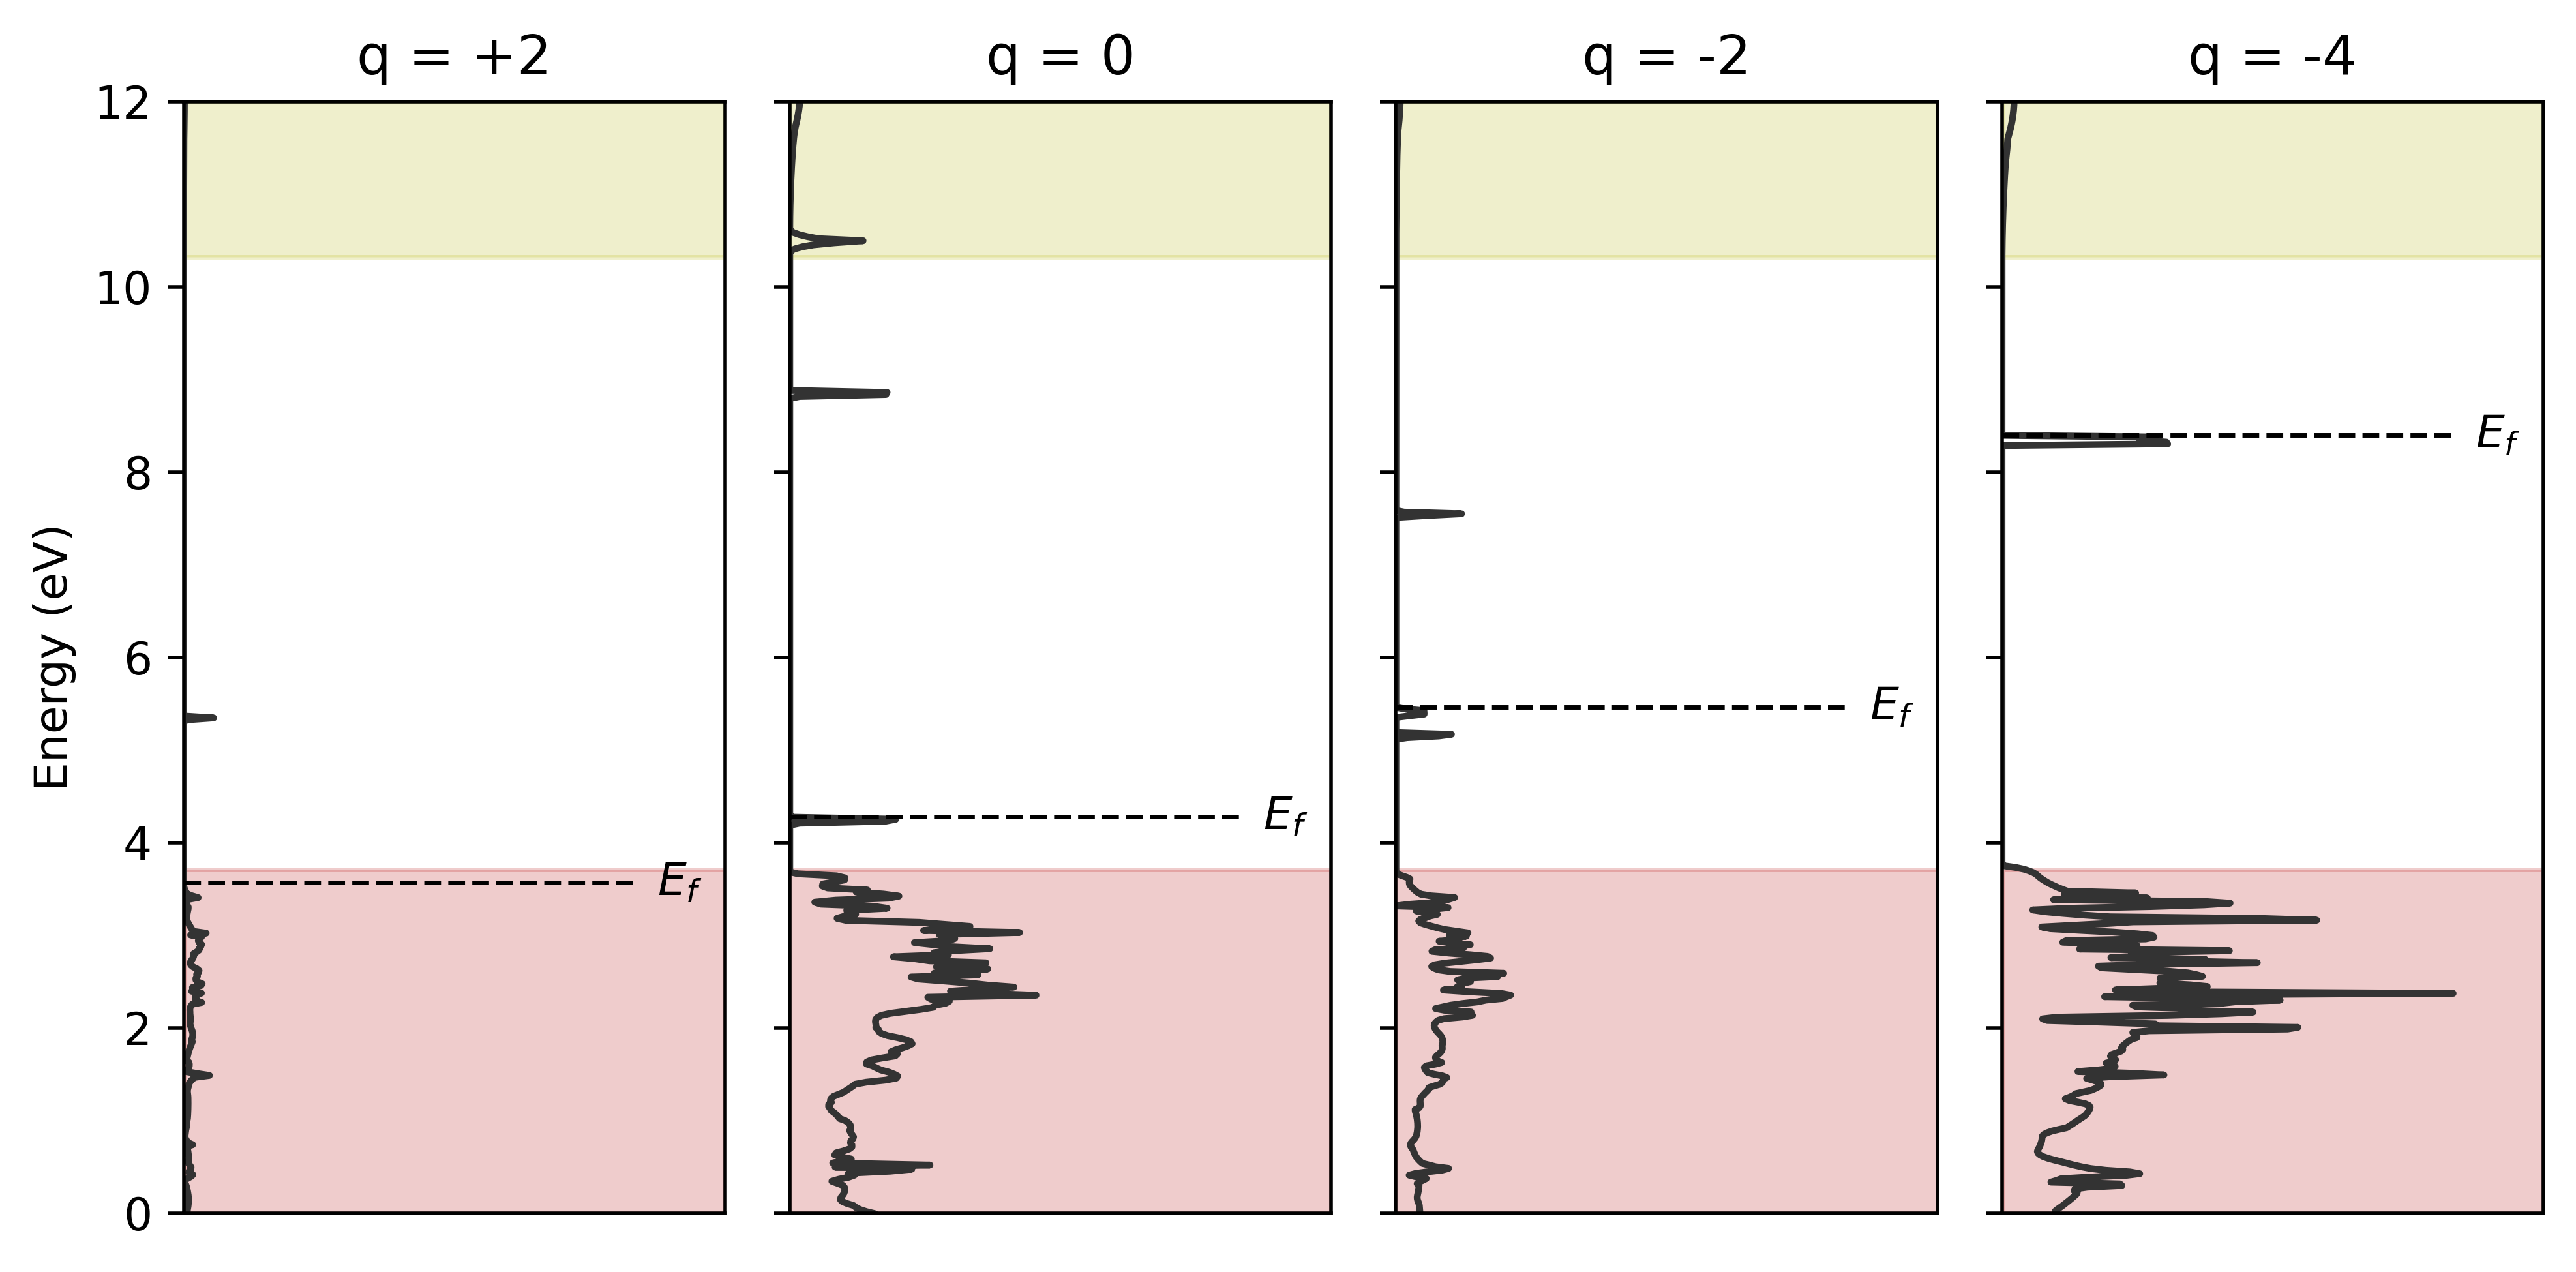

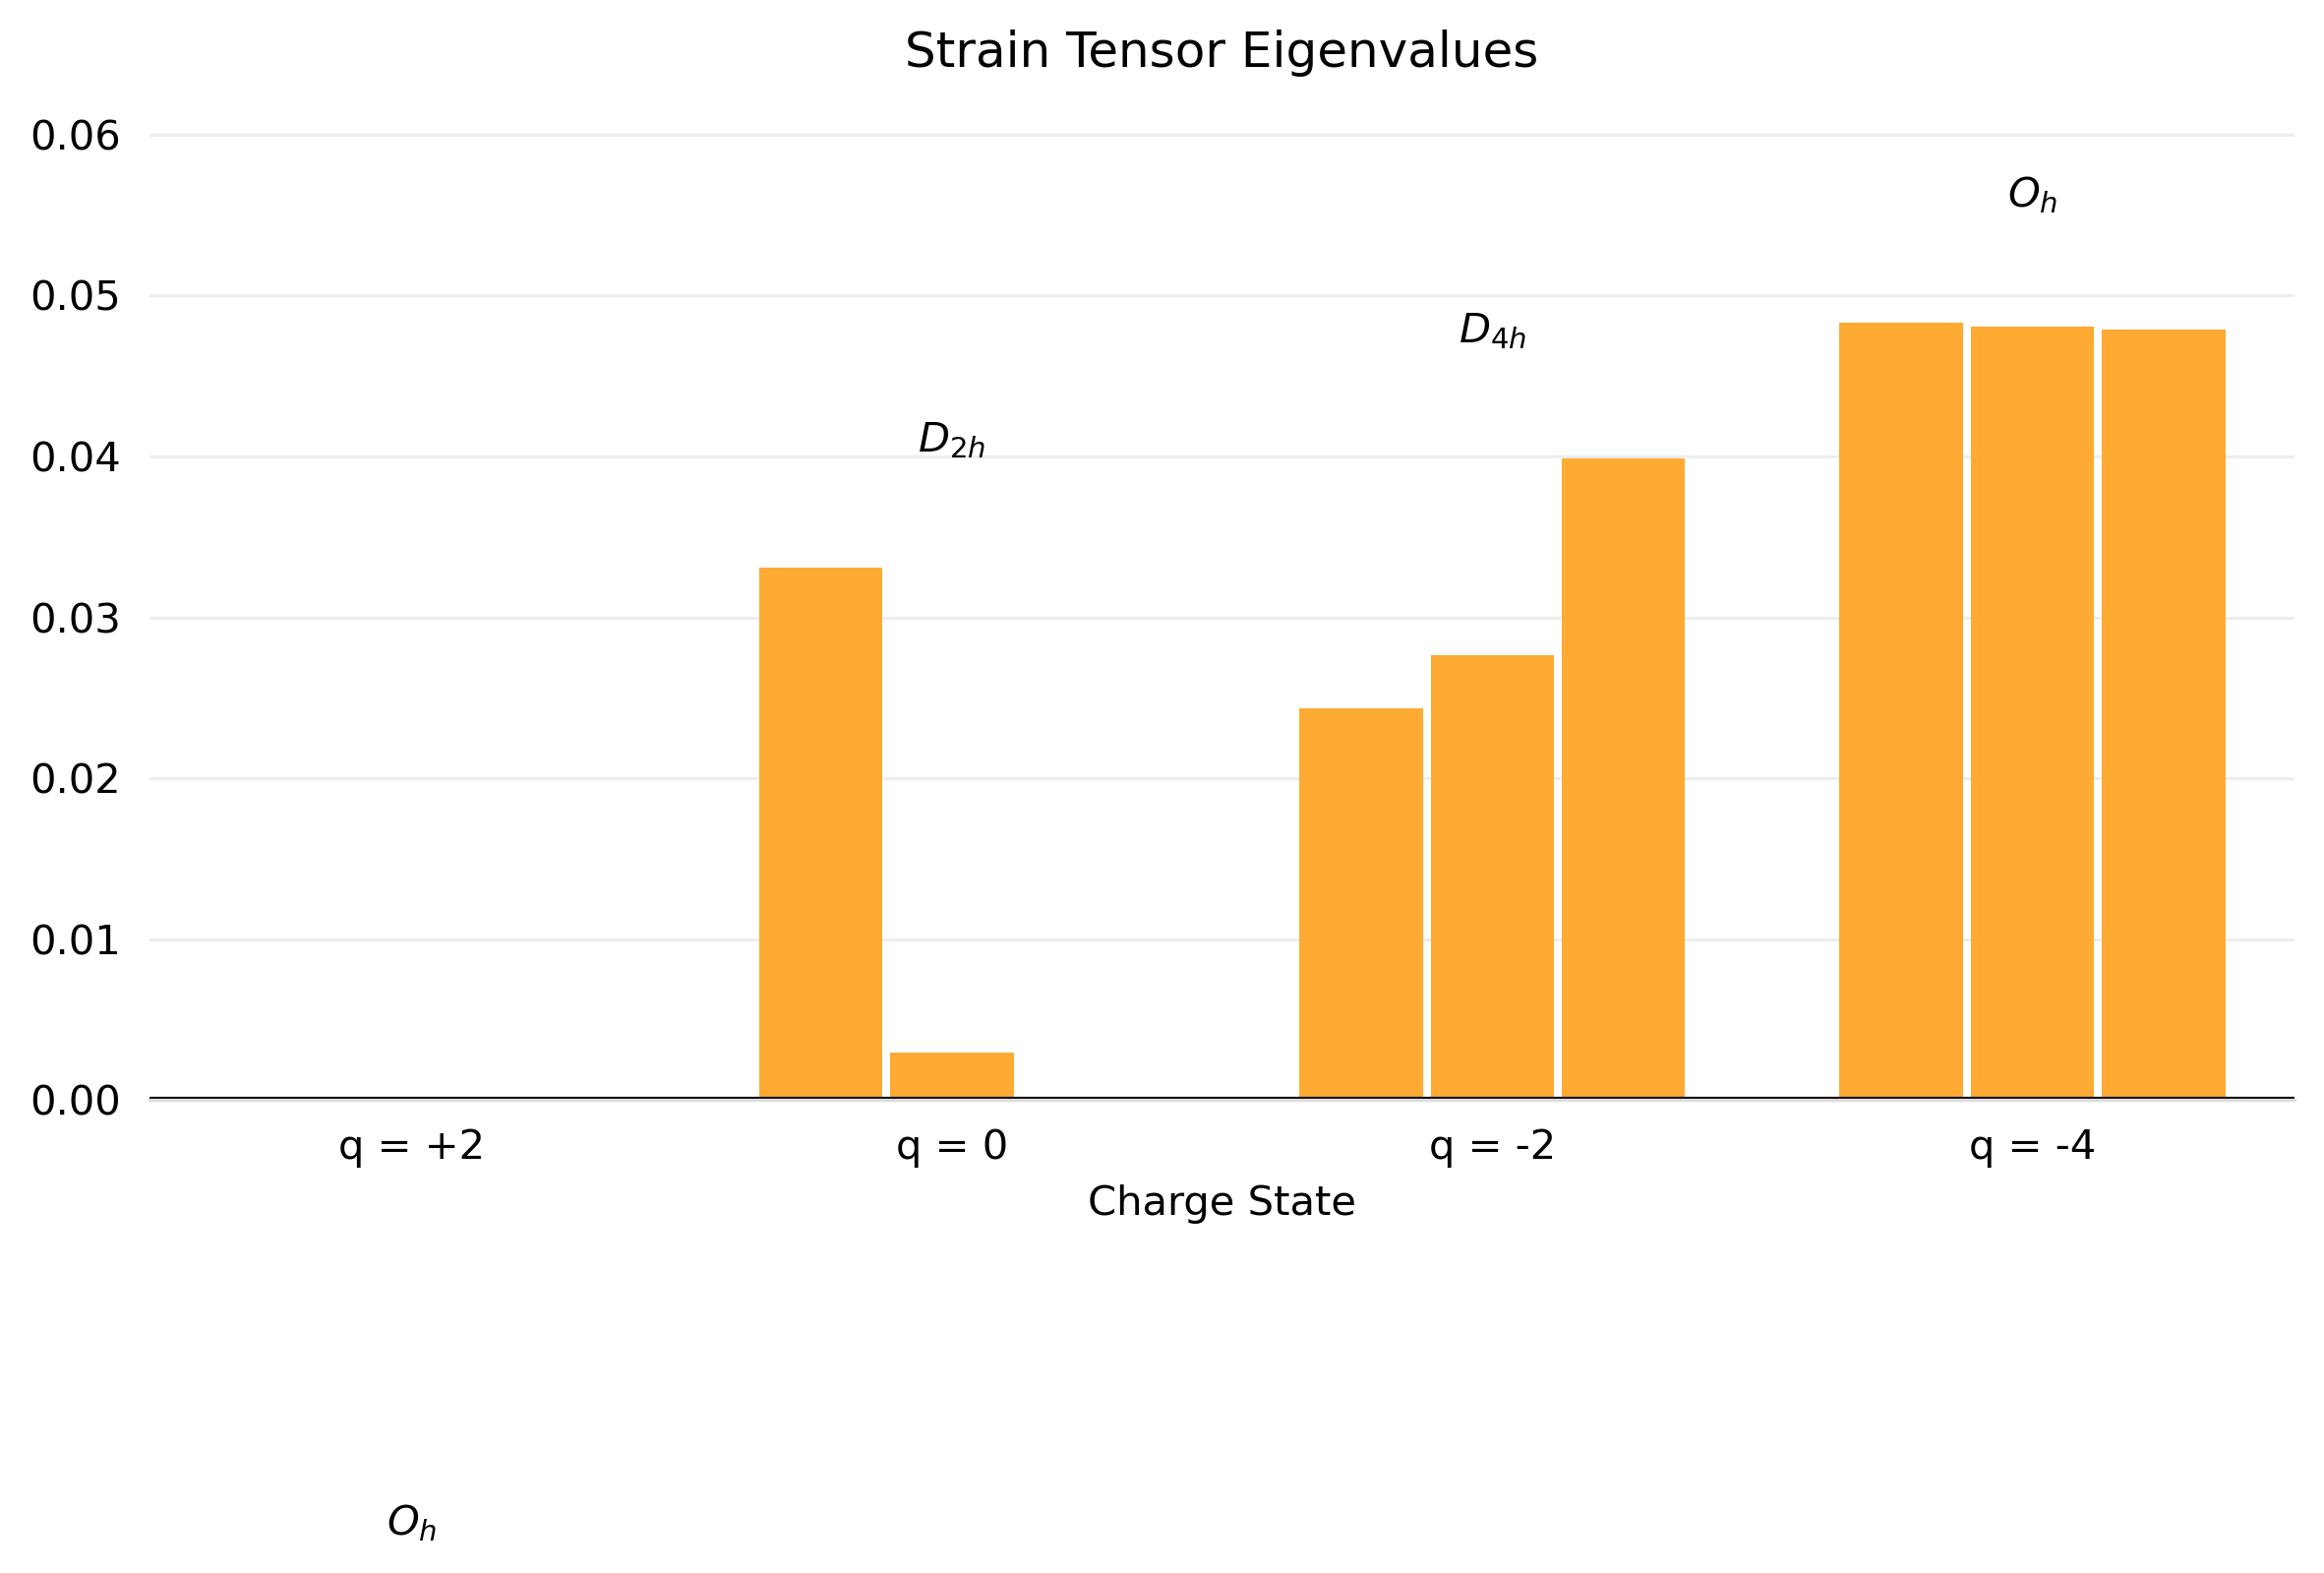

In [5]:
###########################
# Density of States Plots #
###########################
base = "DFT_Data/No_Sym/Oxygen_Antisite/DOS/"
address_list = ["q+2", "q0",  "q-2", "q-4"] 
label_list = ["q = +2", "q = 0", "q = -2", "q = -4"] 
fermi_level_data = pd.read_csv(base+"Fermi_Level.txt", delim_whitespace=True)
fermi_level_list = list(fermi_level_data["Fermi_Level"][[0, 2, 4, 6]])
doscar_plot(base, address_list, label_list, fermi_level_list, "Images/O_Antisite_DOS.pdf")


############################
# Strain Tensor Bar Charts #
############################
reference = pd.read_csv("DFT_Data/No_Sym/Oxygen_Antisite/POS/reference", delim_whitespace=True)
qplus2_pos = pd.read_csv("DFT_Data/No_Sym/Oxygen_Antisite/POS/q+2", delim_whitespace=True)
q0_pos = pd.read_csv("DFT_Data/No_Sym/Oxygen_Antisite/POS/q0", delim_whitespace=True)
qminus2_pos = pd.read_csv("DFT_Data/No_Sym/Oxygen_Antisite/POS/q-2", delim_whitespace=True)
qminus4_pos = pd.read_csv("DFT_Data/No_Sym/Oxygen_Antisite/POS/q-4", delim_whitespace=True)
pos_list = [qplus2_pos, q0_pos, qminus2_pos, qminus4_pos]
label_list = ["q = +2", "q = 0", "q = -2", "q = -4"] 
defect_pos = lattice_constant*np.array([0.5, 0.5, 0.5])
ref_pos = (lattice_constant*np.array(reference["X"]), 
           lattice_constant*np.array(reference["Y"]), 
           lattice_constant*np.array(reference["Z"]))
strain_tensor_bar(pos_list, label_list, defect_pos, ref_pos, "Images/O_Antisite")

<h1>Oxygen Interstitial</h1>

<p>The Oxygen interstitial defect is composed of an Oxygen atom contained within a cube of Oxygen and Magnesium atoms such that corners of the cube which hold Magnesium atoms are adjacent to corners of the cube which hold Oxygen atoms. The interstitial Oxygen atom can therefore be thought to reside within two separate interlocking tetrahedrons of Oxygen and Magnesium atoms. Therefore, the tetrahedral SALC analysis is necessary to investigate the molecular orbital structure. </p>

<p>The strain tensor bar charts however show that Jahn-Teller model is insufficient to explain the behavior of the defect state as it undergoes charge state transitions. We can see that charge states q = +4, q = +2, and q = 0 all exhibit monoclinic symmetry at the defect site. Particularly worrisome is charge state q = +4. The analysis up to this point would have predicted the defect site in this charge state would exhibit cubic symmetry not monoclinic symmetry. The only charge state which matches the expected behavior of the model is the q = -2 which does exhibit cubic symmetry. This should be expected from a charge state associated with all the localized states being filled. The answer to the peculiar behavior of the Oxygen interstitial defect lies in peroxide bond formation. The image below shows the defect site in the q = +4 charge state. The central Oxygen atom has moved much closer to two of the Oxygen atoms on the cube into the range of distances associated with peroxide bond lengths. This explains the drastic break in symmetry. The peroxide bonds form as a result of the Oxygen being forced into a high oxidation state. </p>


<img src="Images/peroxide_q%2B4.png"/>

<p>In the q = -2 charge state, the peroxide bonds are broken and the cubic symmetry is restored.</p>

<img src="Images/peroxide_q-2.png"/>


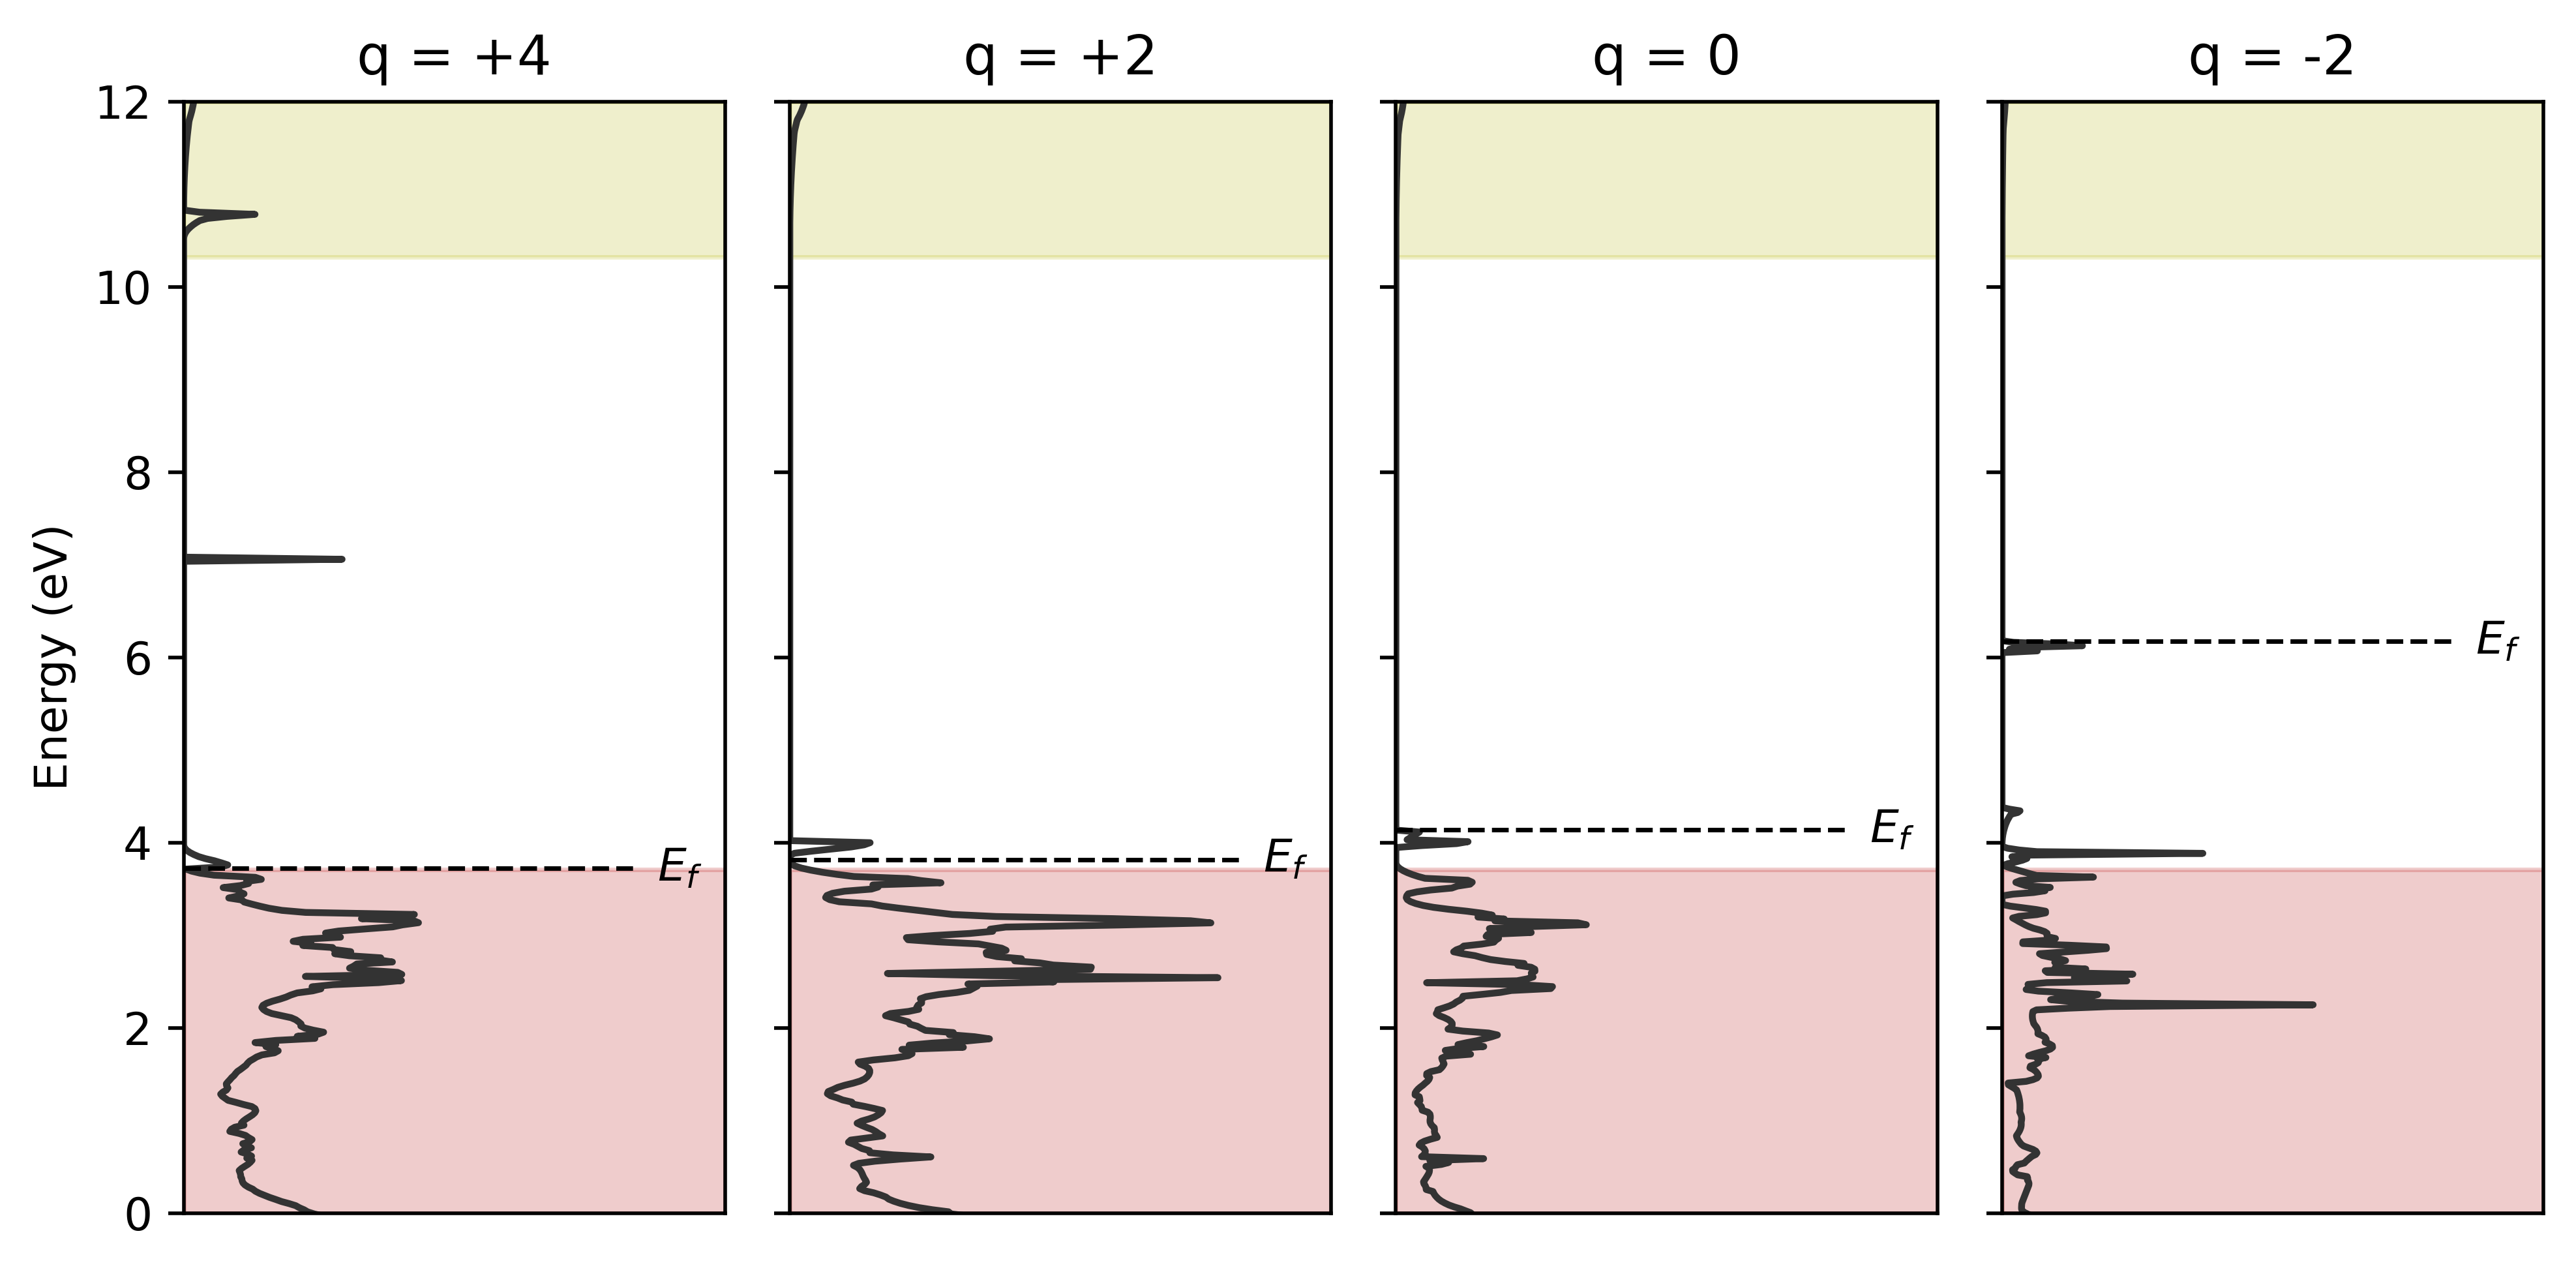

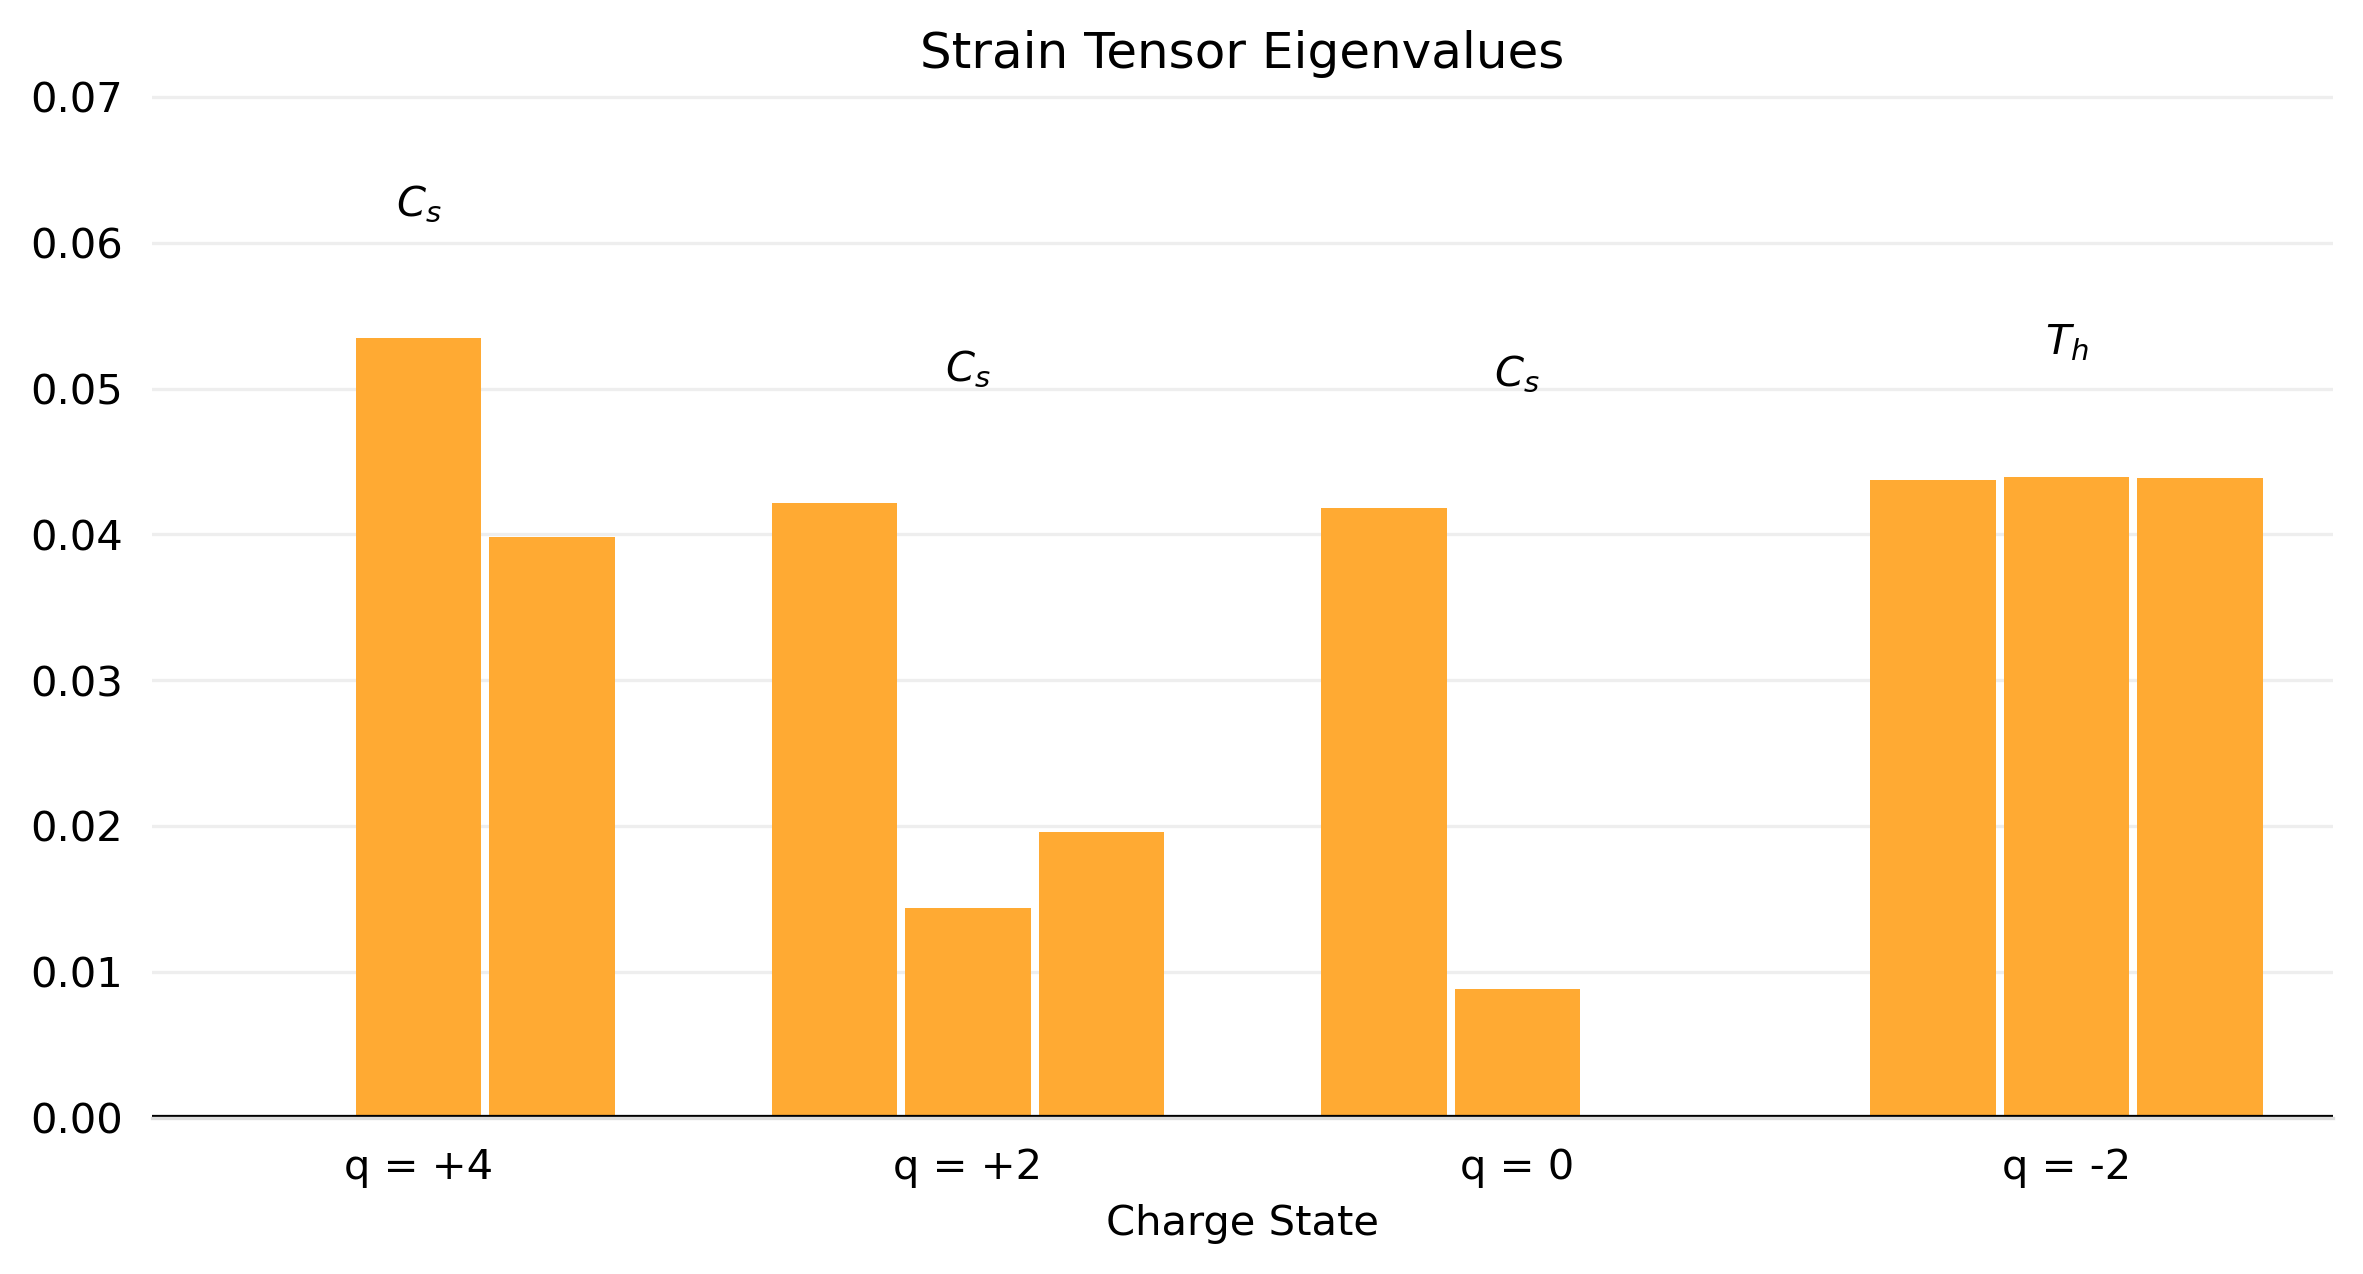

In [6]:
###########################
# Density of States Plots #
###########################
base = "DFT_Data/No_Sym/Oxygen_Interstitial/DOS/"
address_list = ["q+4", "q+2",   "q0",  "q-2"] 
label_list = ["q = +4", "q = +2",  "q = 0", "q = -2"]
fermi_level_data = pd.read_csv(base+"Fermi_Level.txt", delim_whitespace=True)
fermi_level_list = list(fermi_level_data["Fermi_Level"][[0, 2, 4, 6]])
doscar_plot(base, address_list, label_list, fermi_level_list, "Images/O_Interstitial_DOS.pdf")


############################
# Strain Tensor Bar Charts #
############################
reference = pd.read_csv("DFT_Data/No_Sym/Oxygen_Interstitial/POS/reference", delim_whitespace=True)
qplus2_pos = pd.read_csv("DFT_Data/No_Sym/Oxygen_Interstitial/POS/q+2", delim_whitespace=True)
q0_pos = pd.read_csv("DFT_Data/No_Sym/Oxygen_Interstitial/POS/q0", delim_whitespace=True)
qminus2_pos = pd.read_csv("DFT_Data/No_Sym/Oxygen_Interstitial/POS/q-2", delim_whitespace=True)
qplus4_pos = pd.read_csv("DFT_Data/No_Sym/Oxygen_Interstitial/POS/q+4", delim_whitespace=True)
pos_list = [qplus4_pos, qplus2_pos, q0_pos, qminus2_pos]
label_list = ["q = +4", "q = +2",  "q = 0", "q = -2"]
defect_pos = lattice_constant*np.array([0.375, 0.375, 0.375])
ref_pos = (lattice_constant*np.array(reference["X"]), 
           lattice_constant*np.array(reference["Y"]), 
           lattice_constant*np.array(reference["Z"]))
strain_tensor_bar(pos_list, label_list, defect_pos, ref_pos, "Images/O_Interstitial")

<h1>Magnesium Interstial</h1>

<p>
The Magnesium interstitial consists of a Magnesium atom surrounded by a cubic cage of Oxygen and Magnesium atoms. The Oxygen atoms occupy four corners of the cube and the Magnesium atoms occupy the other four corners. The Oxygen atoms on the cube are only adjacent to the Magnesium atoms and vice versa. This effectively puts the interstitial Magnesium atom within two interlocking tetrahedrons, one consisting of Oxygen atoms and the other consisting of Magnesium atoms. The charge state of the Magnesium interstitial defect is constant across the band gap implying that no defect electronic states are located within the band gap.
</p>

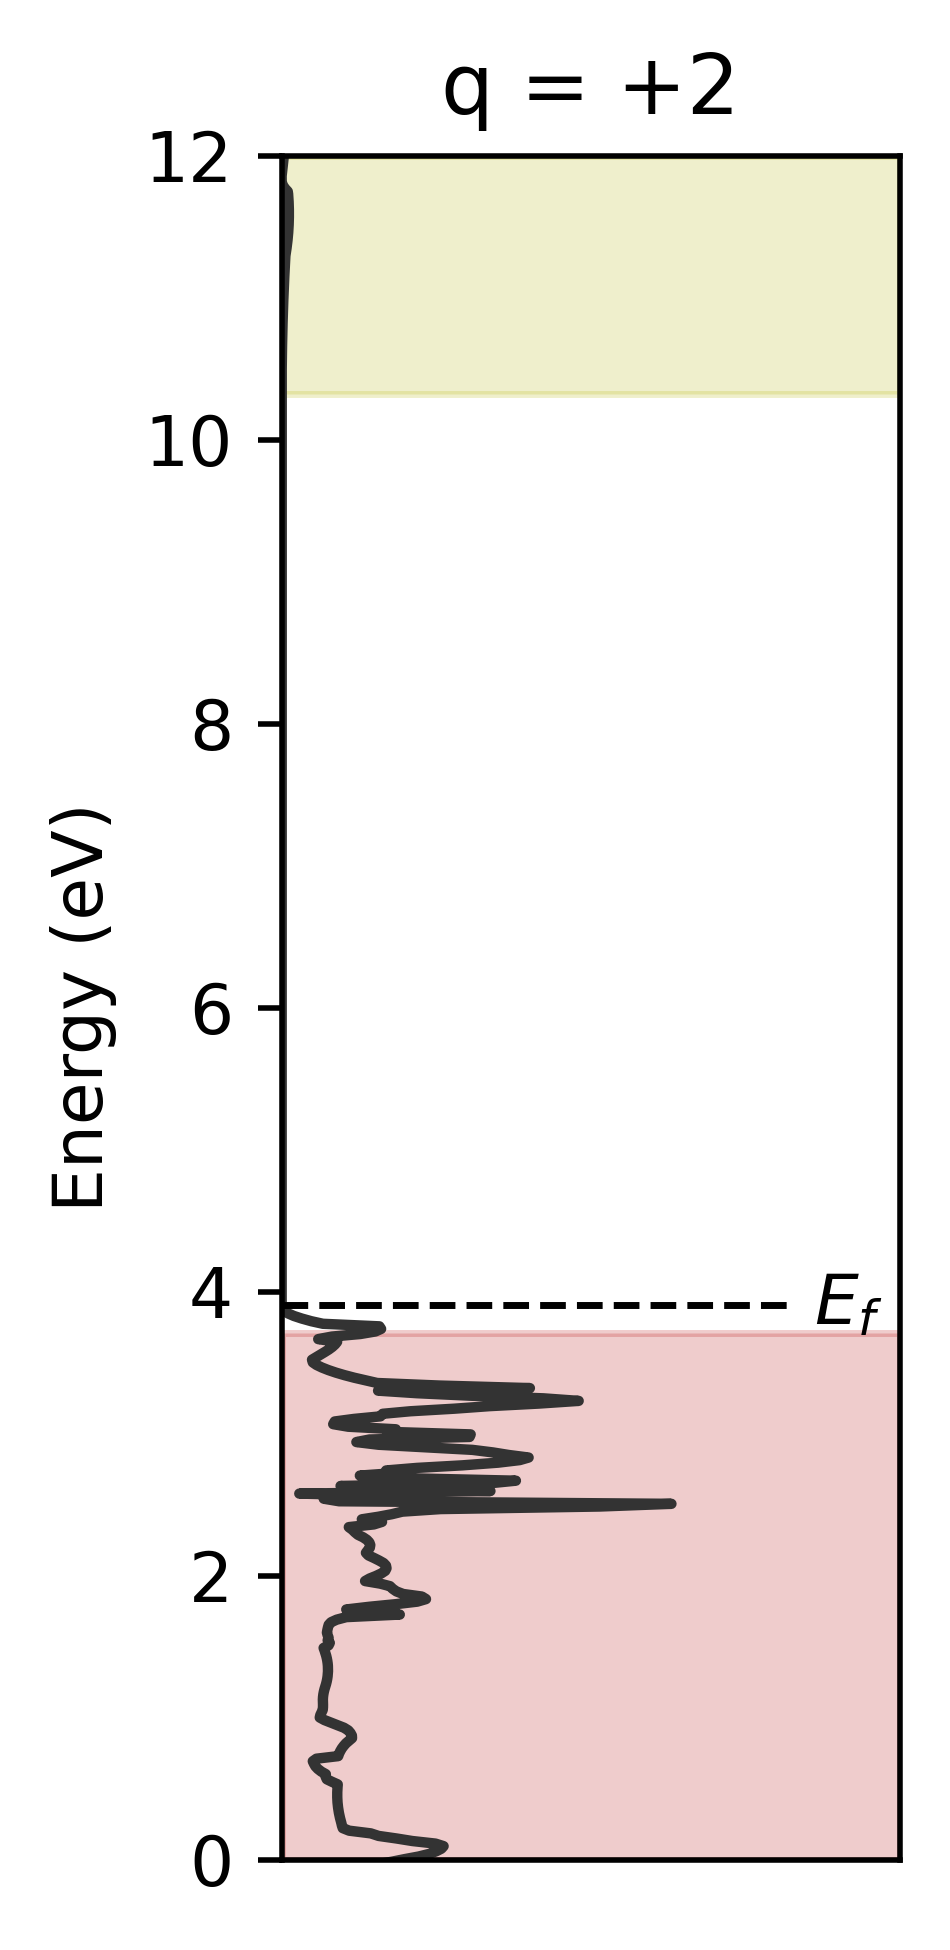

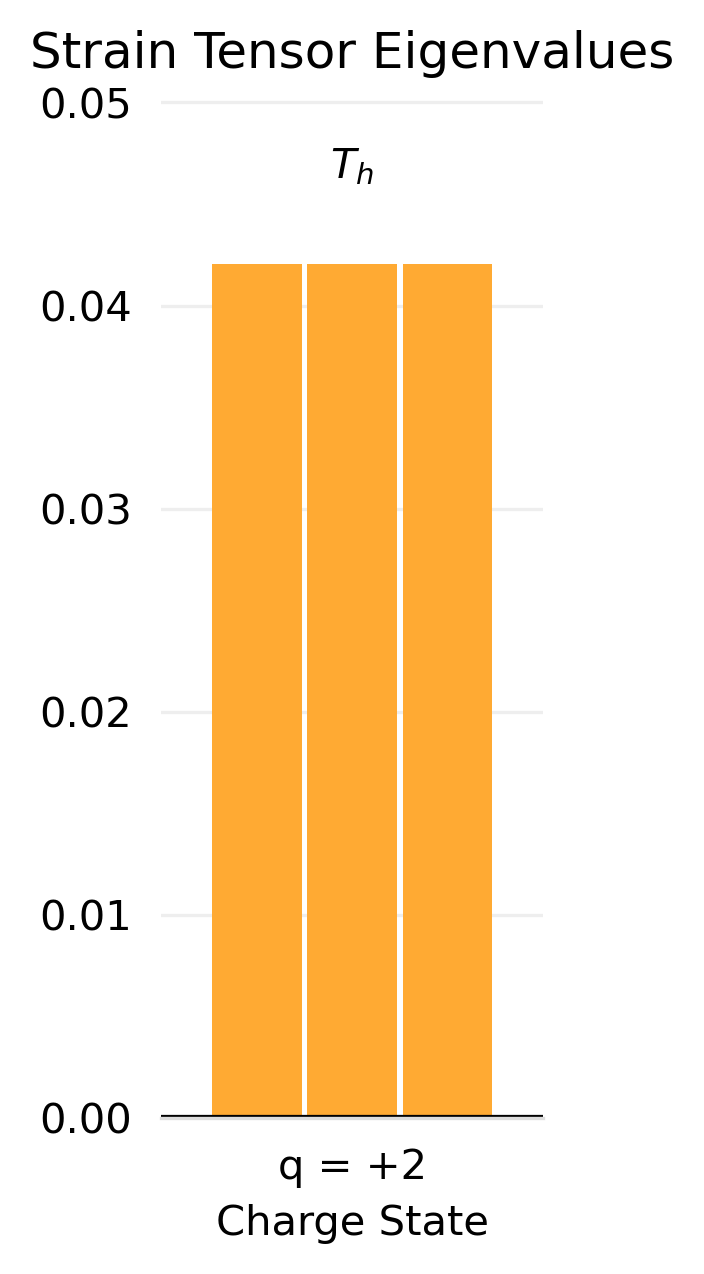

In [7]:
###########################
# Density of States Plots #
###########################
base = "DFT_Data/Sym/Magnesium_Interstitial/DOS/"
address_list = [ "q+2"] 
label_list = [ "q = +2"]
fermi_level_data = pd.read_csv(base+"Fermi_Level.txt", delim_whitespace=True)
fermi_level_list = [fermi_level_data["Fermi_Level"][2]]
doscar_plot(base, address_list, label_list, fermi_level_list, "Images/Mg_Interstitial_DOS.pdf")


############################
# Strain Tensor Bar Charts #
############################
reference = pd.read_csv("DFT_Data/Sym/Magnesium_Interstitial/POS/reference", delim_whitespace=True)
qplus2_pos = pd.read_csv("DFT_Data/Sym/Magnesium_Interstitial/POS/q+2", delim_whitespace=True)
pos_list = [qplus2_pos]
label_list = ["q = +2"]
defect_pos = lattice_constant*np.array([0.375, 0.375, 0.375])
ref_pos = (lattice_constant*np.array(reference["X"]), 
           lattice_constant*np.array(reference["Y"]), 
           lattice_constant*np.array(reference["Z"]))
strain_tensor_bar(pos_list, label_list, defect_pos, ref_pos, "Images/Mg_Interstitial")

<h1>Magnesium Vacancy</h1>

<p>The Magnesium vacancy defect consists of an octahedron of Oxygen atoms with an empty space at the center where the Magnesium atom normally would be. The electronic states associated with the Magnesium vacancy are not located within the band gap, so a charge transition and corresponding distortion in the lattice do not occur. </p>


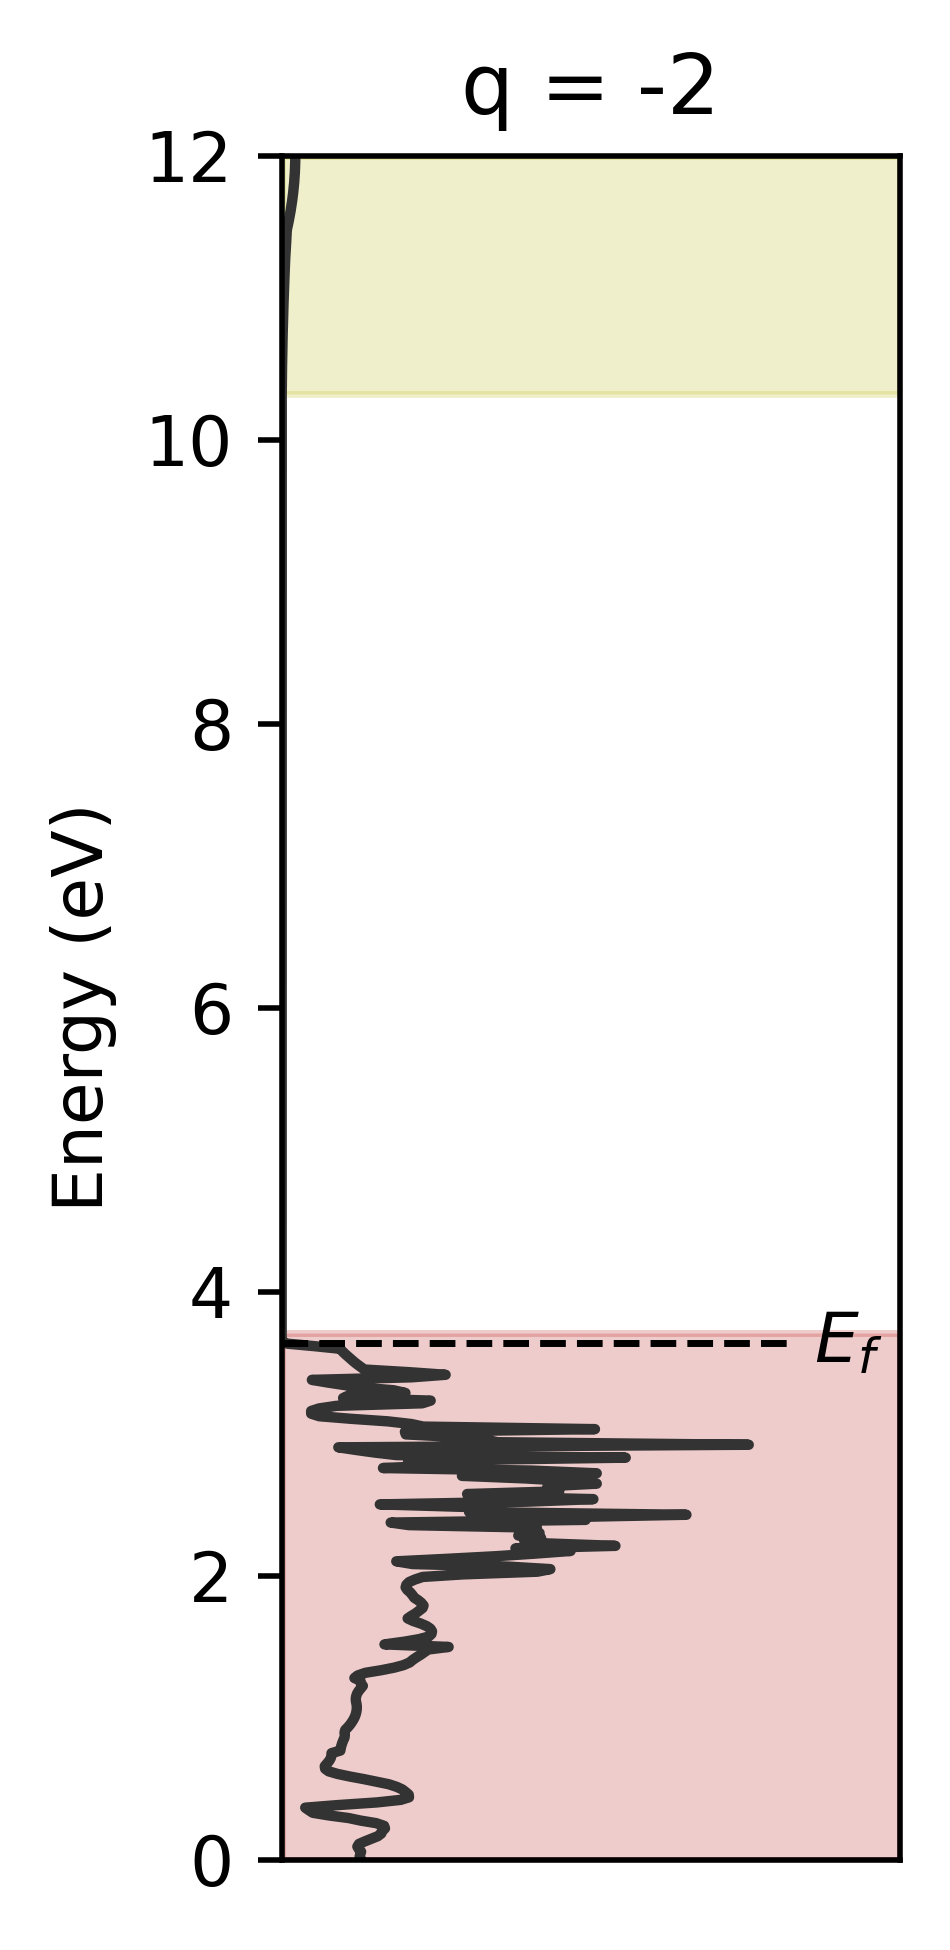

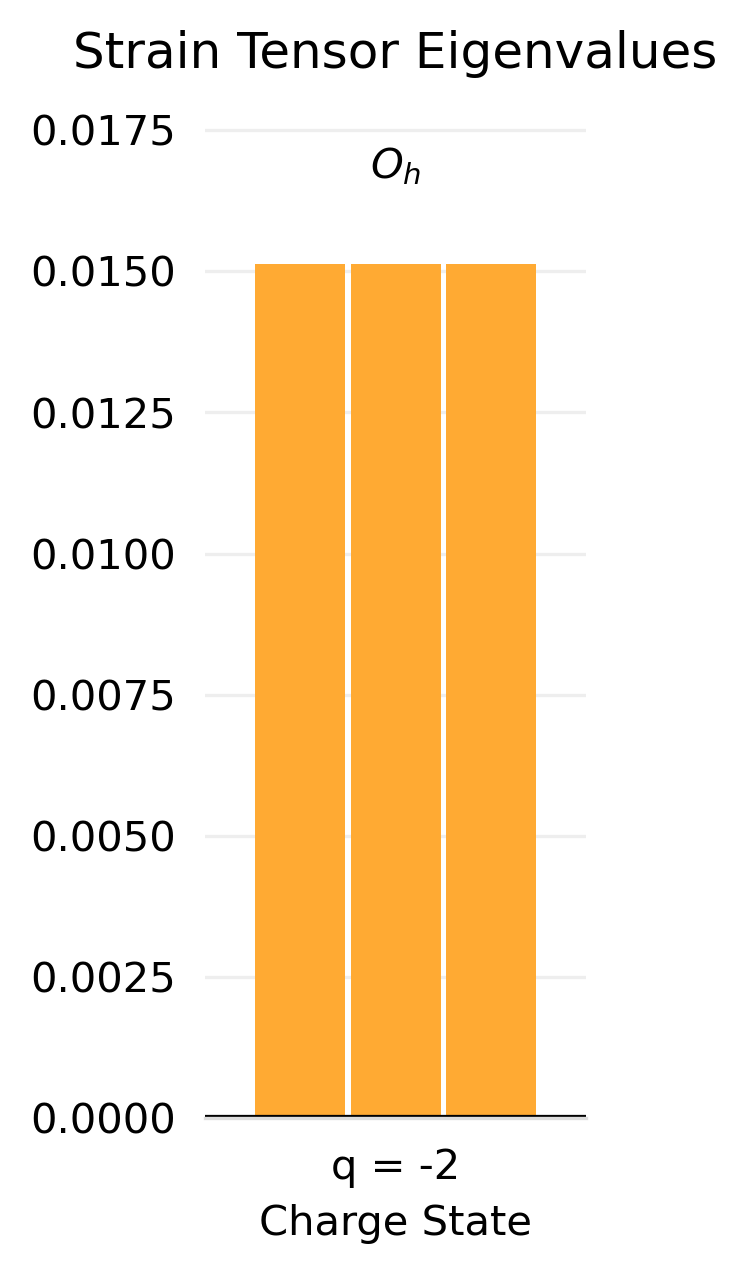

In [8]:
###########################
# Density of States Plots #
###########################
base = "DFT_Data/Sym/Magnesium_Vacancy/DOS/"
address_list = [ "q-2"] 
label_list = [ "q = -2"]
fermi_level_data = pd.read_csv(base+"Fermi_Level.txt", delim_whitespace=True)
fermi_level_list = [fermi_level_data["Fermi_Level"][2]]
doscar_plot(base, address_list, label_list, fermi_level_list, "Images/Mg_Vacancy_DOS.pdf")


############################
# Strain Tensor Bar Charts #
############################
reference = pd.read_csv("DFT_Data/Sym/Magnesium_Vacancy/POS/reference", delim_whitespace=True)
qplus2_pos = pd.read_csv("DFT_Data/Sym/Magnesium_Vacancy/POS/q+2", delim_whitespace=True)
pos_list = [qplus2_pos]
label_list = ["q = -2"]
defect_pos = lattice_constant*np.array([0.5, 0.5, 0.5])
ref_pos = (lattice_constant*np.array(reference["X"]), 
           lattice_constant*np.array(reference["Y"]), 
           lattice_constant*np.array(reference["Z"]))
strain_tensor_bar(pos_list, label_list, defect_pos, ref_pos, "Images/Mg_Vacancy")